In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt
import math
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv("Concrete_Data_fix.csv")

# normalize
for i in ["Cement", "Slag", "Fly_Ash", "Water", "Superplastic", "Coarse_Aggr", "Fine_Aggr", "Age", "CCStr"]:
    df[i]=(df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))*100

# seperate to X and y
X=df.drop(["CCStr"],axis=1)
y=df["CCStr"]

df

,Cement,Slag,Fly_Ash,Water,Superplastic,Coarse_Aggr,Fine_Aggr,Age,CCStr
0,100.000000,0.0,0.0,32.108626,7.763975,69.476744,20.572002,25.0,96.748474
1,100.000000,0.0,0.0,32.108626,7.763975,73.837209,20.572002,25.0,74.199576
2,52.625571,50.0,0.0,84.824281,0.000000,38.081395,0.000000,100.0,47.265479
3,52.625571,50.0,0.0,84.824281,0.000000,38.081395,0.000000,100.0,48.237199
4,22.054795,50.0,0.0,56.070288,0.000000,51.569767,58.078274,100.0,52.286035
...,...,...,...,...,...,...,...,...,...
1025,39.817352,25.0,25.0,46.166134,27.639752,20.087209,43.728048,25.0,52.261119
1026,50.273973,0.0,50.0,59.265176,32.298137,4.912791,55.042649,25.0,35.941198
1027,10.616438,50.0,50.0,56.629393,18.944099,26.569767,46.663322,25.0,26.622649
1028,13.036530,75.0,0.0,42.971246,35.093168,54.825581,48.896136,25.0,37.922013


In [3]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fitting models on Training data 
    lr.fit(X_train, y_train) 
    lasso.fit(X_train, y_train) 
    ridge.fit(X_train, y_train) 
    enet.fit(X_train, y_train) 

    # training and testing with different models and different categorical feature handling methods
    y_pred_lr = lr.predict(X_test) 
    y_pred_lasso = lasso.predict(X_test) 
    y_pred_ridge = ridge.predict(X_test)
    y_pred_enet = enet.predict(X_test)

    list1.append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    list2.append(r2_score(y_test, y_pred_lr))
    list3.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    list4.append(r2_score(y_test, y_pred_lasso))
    list5.append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    list6.append(r2_score(y_test, y_pred_ridge))
    list7.append(np.sqrt(mean_squared_error(y_test, y_pred_enet)))
    list8.append(r2_score(y_test, y_pred_enet))
    
# print("Model\t\t   RMSE \t  R2") 
# print("Linear Regression  {:.4f} \t{:.4f}".format(list1[2], list2[2])) 
# print("Lasso Regression   {:.4f} \t{:.4f}".format(list3[2], list4[2]))
# print("Ridge Regression   {:.4f} \t{:.4f}".format(list5[2], list6[2]))
# print("Enet Regression    {:.4f} \t{:.4f}".format(list7[2], list8[2]))
print("Finish!!")

Finish!!


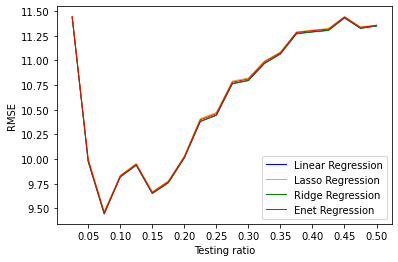

In [4]:
plt.plot(ratio, list1, lw=1, c='blue', label='Linear Regression')  # plot y1
plt.plot(ratio, list3, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list5, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list7, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('RMSE')  # y軸名字
plt.legend()
plt.show()

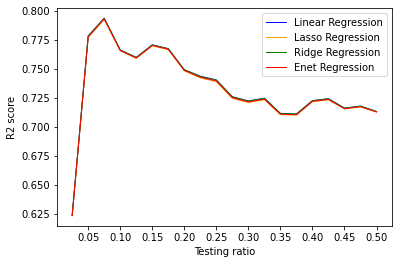

In [5]:
plt.plot(ratio, list2, lw=1, c='blue', ms=4, label='Linear Regression')  # plot y1
plt.plot(ratio, list4, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list6, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list8, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('R2 score')  # y軸名字
plt.legend()
plt.show()

In [6]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
enet.fit(X_train, y_train) 

# training and testing with different models and different categorical feature handling methods
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test)
y_pred_enet = enet.predict(X_test)
    
print("Model\t\t    RMSE \t  R2") 
print("Linear Regression  {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("Lasso Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)))
print("Ridge Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))
print("Enet Regression    {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_enet)), r2_score(y_test, y_pred_enet)))

Model		    RMSE 	  R2
Linear Regression  9.6520	0.7708
Lasso Regression   9.6683	0.7700
Ridge Regression   9.6520	0.7708
Enet Regression    9.6619	0.7703


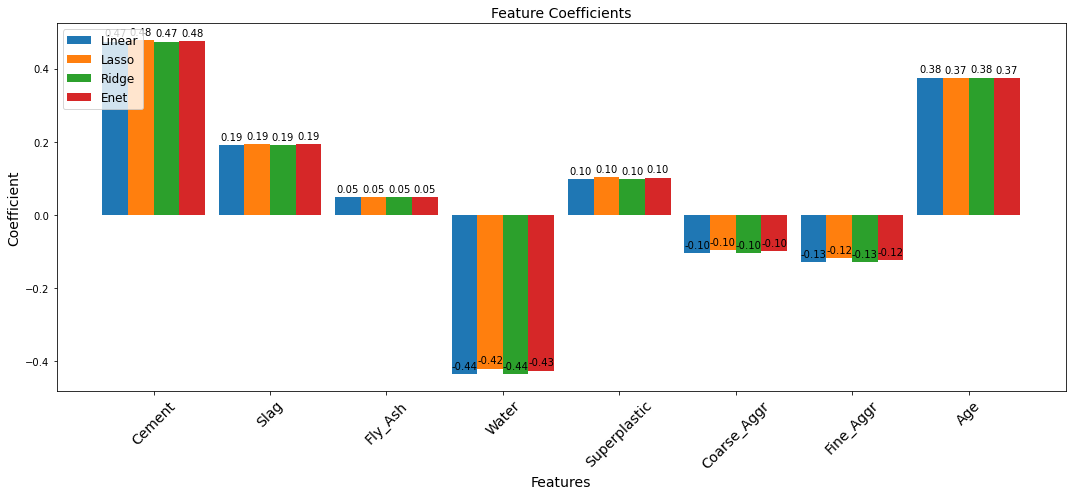

In [7]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 
coeff_enet = enet.coef_

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.22
fig, ax = plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - 3*(width/2), coeff_lr, width, label='Linear') 
rects2 = ax.bar(x - 1*(width/2), coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 1*(width/2), coeff_ridge, width, label='Ridge') 
rects4 = ax.bar(x + 3*(width/2), coeff_enet, width, label='Enet') 
ax.set_ylabel('Coefficient', fontsize = 14) 
ax.set_xlabel('Features', fontsize = 14) 
ax.set_title('Feature Coefficients', fontsize = 14) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 14) 
ax.legend(loc=2, fontsize = 12) 
def autolabel(rects): 
    """Attach a text label above each bar in *rects*, displaying its height.""" 
    for rect in rects: 
        height = rect.get_height() 
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3)
autolabel(rects4)
fig.tight_layout() 
plt.show()

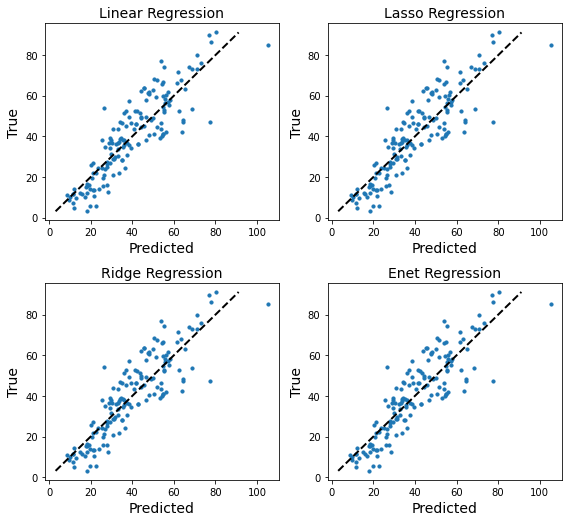

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Linear Regression", fontsize = 14) 

ax2.scatter(y_pred_lasso, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("Lasso Regression", fontsize = 14) 

ax3.scatter(y_pred_ridge, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("Ridge Regression", fontsize = 14) 

ax4.scatter(y_pred_enet, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Enet Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [20]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=2000)
svm = SVR()

list9=[]
list10=[]
list11=[]
list12=[]
list13=[]
list14=[]
list15=[]
list16=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    dtr.fit(X_train, y_train) 
    knn.fit(X_train, y_train) 
    mlp.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_dtr = dtr.predict(X_test) 
    y_pred_knn = knn.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    
    list9.append(np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
    list10.append(r2_score(y_test, y_pred_dtr))
    list11.append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))
    list12.append(r2_score(y_test, y_pred_knn))
    list13.append(np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
    list14.append(r2_score(y_test, y_pred_mlp))
    list15.append(np.sqrt(mean_squared_error(y_test, y_pred_svm)))
    list16.append(r2_score(y_test, y_pred_svm))
    
print("Finish!!")

Finish!!


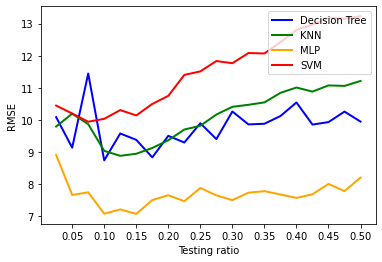

In [21]:
plt.plot(ratio, list9,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list11, lw=2, c='green', label='KNN')
plt.plot(ratio, list13, lw=2, c='orange', label='MLP')
plt.plot(ratio, list15, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=1)
plt.show()

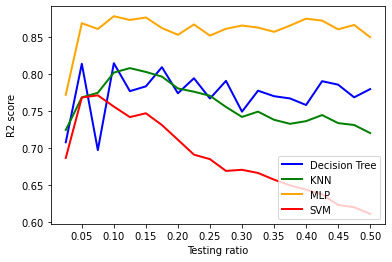

In [22]:
plt.plot(ratio, list10,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list12, lw=2, c='green', label='KNN')
plt.plot(ratio, list14, lw=2, c='orange', label='MLP')
plt.plot(ratio, list16, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend(loc=4)
plt.show()

In [12]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=1000)
svm = SVR()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data
dtr.fit(X_train, y_train) 
knn.fit(X_train, y_train) 
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
    
# training and testing with different models and different categorical feature handling methods
y_pred_dtr = dtr.predict(X_test) 
y_pred_knn = knn.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_svm = svm.predict(X_test)
    
print("Model\t\t RMSE \t   R2") 
print("Decision Tree   {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
print("KNN Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_knn)), r2_score(y_test, y_pred_knn)))
print("MLP Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_mlp)), r2_score(y_test, y_pred_mlp)))
print("SVM Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_svm)), r2_score(y_test, y_pred_svm)))

Model		 RMSE 	   R2
Decision Tree   9.3389	 0.7854
KNN Regression  8.9451	 0.8031
MLP Regression  7.0610	 0.8773
SVM Regression  10.1388	 0.7470


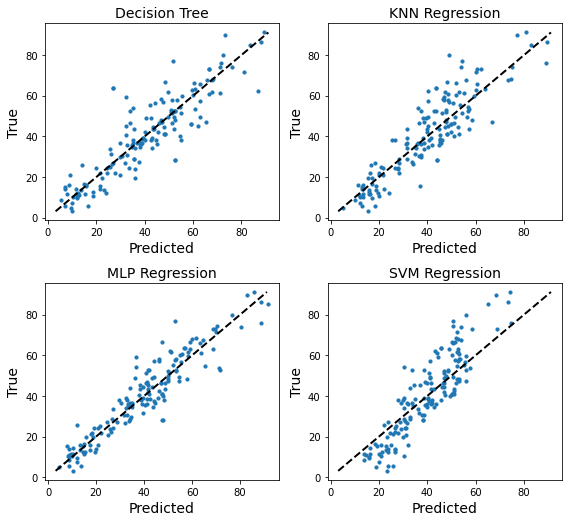

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_dtr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Decision Tree", fontsize = 14) 

ax2.scatter(y_pred_knn, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("KNN Regression", fontsize = 14) 

ax3.scatter(y_pred_mlp, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("MLP Regression", fontsize = 14) 

ax4.scatter(y_pred_svm, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("SVM Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [14]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

list17=[]
list18=[]
list19=[]
list20=[]
list21=[]
list22=[]
list23=[]
list24=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    lgbm.fit(X_train, y_train) 
    xgb.fit(X_train, y_train) 
    cat.fit(X_train, y_train) 
    rdf.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_lgbm=lgbm.predict(X_test)
    y_pred_xgb = xgb.predict(X_test)
    y_pred_cat = cat.predict(X_test)
    y_pred_rdf = rdf.predict(X_test)
    
    list17.append(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    list18.append(r2_score(y_test, y_pred_lgbm))
    list19.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
    list20.append(r2_score(y_test, y_pred_xgb))
    list21.append(np.sqrt(mean_squared_error(y_test, y_pred_cat)))
    list22.append(r2_score(y_test, y_pred_cat))
    list23.append(np.sqrt(mean_squared_error(y_test, y_pred_rdf)))
    list24.append(r2_score(y_test, y_pred_rdf))

print("Finish!!")    

Learning rate set to 0.040969
0:	learn: 20.3284529	total: 147ms	remaining: 2m 27s
1:	learn: 19.8047971	total: 149ms	remaining: 1m 14s
2:	learn: 19.3532278	total: 150ms	remaining: 50s
3:	learn: 18.8725215	total: 152ms	remaining: 37.8s
4:	learn: 18.4325042	total: 153ms	remaining: 30.5s
5:	learn: 17.9700299	total: 155ms	remaining: 25.7s
6:	learn: 17.5741128	total: 157ms	remaining: 22.2s
7:	learn: 17.1314852	total: 158ms	remaining: 19.6s
8:	learn: 16.7124983	total: 160ms	remaining: 17.6s
9:	learn: 16.3214941	total: 161ms	remaining: 16s
10:	learn: 15.9575409	total: 163ms	remaining: 14.6s
11:	learn: 15.6336771	total: 164ms	remaining: 13.5s
12:	learn: 15.3295986	total: 166ms	remaining: 12.6s
13:	learn: 15.0097918	total: 167ms	remaining: 11.8s
14:	learn: 14.6903360	total: 169ms	remaining: 11.1s
15:	learn: 14.4237268	total: 170ms	remaining: 10.4s
16:	learn: 14.1207788	total: 171ms	remaining: 9.9s
17:	learn: 13.8415549	total: 173ms	remaining: 9.42s
18:	learn: 13.5593909	total: 174ms	remaining: 8

262:	learn: 5.1704813	total: 510ms	remaining: 1.43s
263:	learn: 5.1627782	total: 512ms	remaining: 1.43s
264:	learn: 5.1600745	total: 513ms	remaining: 1.42s
265:	learn: 5.1551217	total: 515ms	remaining: 1.42s
266:	learn: 5.1486699	total: 516ms	remaining: 1.42s
267:	learn: 5.1436358	total: 518ms	remaining: 1.41s
268:	learn: 5.1420767	total: 519ms	remaining: 1.41s
269:	learn: 5.1373298	total: 521ms	remaining: 1.41s
270:	learn: 5.1330599	total: 522ms	remaining: 1.41s
271:	learn: 5.1286598	total: 524ms	remaining: 1.4s
272:	learn: 5.1221828	total: 525ms	remaining: 1.4s
273:	learn: 5.1170321	total: 527ms	remaining: 1.4s
274:	learn: 5.1119867	total: 528ms	remaining: 1.39s
275:	learn: 5.1086633	total: 530ms	remaining: 1.39s
276:	learn: 5.1034130	total: 531ms	remaining: 1.39s
277:	learn: 5.0967189	total: 533ms	remaining: 1.38s
278:	learn: 5.0923721	total: 534ms	remaining: 1.38s
279:	learn: 5.0890220	total: 536ms	remaining: 1.38s
280:	learn: 5.0839972	total: 537ms	remaining: 1.37s
281:	learn: 5.0

474:	learn: 4.3984129	total: 837ms	remaining: 925ms
475:	learn: 4.3952402	total: 838ms	remaining: 923ms
476:	learn: 4.3943427	total: 840ms	remaining: 921ms
477:	learn: 4.3928936	total: 842ms	remaining: 919ms
478:	learn: 4.3906304	total: 843ms	remaining: 917ms
479:	learn: 4.3878178	total: 845ms	remaining: 915ms
480:	learn: 4.3858956	total: 846ms	remaining: 913ms
481:	learn: 4.3842847	total: 848ms	remaining: 911ms
482:	learn: 4.3821229	total: 849ms	remaining: 909ms
483:	learn: 4.3782936	total: 851ms	remaining: 907ms
484:	learn: 4.3756208	total: 852ms	remaining: 905ms
485:	learn: 4.3731821	total: 854ms	remaining: 903ms
486:	learn: 4.3705708	total: 856ms	remaining: 901ms
487:	learn: 4.3687447	total: 857ms	remaining: 899ms
488:	learn: 4.3680639	total: 859ms	remaining: 897ms
489:	learn: 4.3659219	total: 860ms	remaining: 895ms
490:	learn: 4.3642200	total: 862ms	remaining: 893ms
491:	learn: 4.3627649	total: 863ms	remaining: 891ms
492:	learn: 4.3594470	total: 865ms	remaining: 889ms
493:	learn: 

681:	learn: 4.0250967	total: 1.16s	remaining: 543ms
682:	learn: 4.0239697	total: 1.17s	remaining: 541ms
683:	learn: 4.0229170	total: 1.17s	remaining: 539ms
684:	learn: 4.0217645	total: 1.17s	remaining: 538ms
685:	learn: 4.0209590	total: 1.17s	remaining: 536ms
686:	learn: 4.0194987	total: 1.17s	remaining: 534ms
687:	learn: 4.0190196	total: 1.17s	remaining: 532ms
688:	learn: 4.0177280	total: 1.18s	remaining: 531ms
689:	learn: 4.0170039	total: 1.18s	remaining: 529ms
690:	learn: 4.0158430	total: 1.18s	remaining: 527ms
691:	learn: 4.0143773	total: 1.18s	remaining: 525ms
692:	learn: 4.0129489	total: 1.18s	remaining: 524ms
693:	learn: 4.0112369	total: 1.18s	remaining: 522ms
694:	learn: 4.0095684	total: 1.19s	remaining: 520ms
695:	learn: 4.0080610	total: 1.19s	remaining: 519ms
696:	learn: 4.0063525	total: 1.19s	remaining: 517ms
697:	learn: 4.0045992	total: 1.19s	remaining: 515ms
698:	learn: 4.0035651	total: 1.19s	remaining: 513ms
699:	learn: 4.0025012	total: 1.19s	remaining: 512ms
700:	learn: 

879:	learn: 3.8316060	total: 1.49s	remaining: 204ms
880:	learn: 3.8308621	total: 1.49s	remaining: 202ms
881:	learn: 3.8294743	total: 1.5s	remaining: 200ms
882:	learn: 3.8286958	total: 1.5s	remaining: 198ms
883:	learn: 3.8281241	total: 1.5s	remaining: 197ms
884:	learn: 3.8274006	total: 1.5s	remaining: 195ms
885:	learn: 3.8265366	total: 1.5s	remaining: 193ms
886:	learn: 3.8261311	total: 1.5s	remaining: 192ms
887:	learn: 3.8250872	total: 1.5s	remaining: 190ms
888:	learn: 3.8248821	total: 1.51s	remaining: 188ms
889:	learn: 3.8244228	total: 1.51s	remaining: 186ms
890:	learn: 3.8237664	total: 1.51s	remaining: 185ms
891:	learn: 3.8229090	total: 1.51s	remaining: 183ms
892:	learn: 3.8220467	total: 1.51s	remaining: 181ms
893:	learn: 3.8212607	total: 1.51s	remaining: 180ms
894:	learn: 3.8207503	total: 1.51s	remaining: 178ms
895:	learn: 3.8205422	total: 1.52s	remaining: 176ms
896:	learn: 3.8197828	total: 1.52s	remaining: 174ms
897:	learn: 3.8190201	total: 1.52s	remaining: 173ms
898:	learn: 3.81879

124:	learn: 6.4640806	total: 163ms	remaining: 1.14s
125:	learn: 6.4484188	total: 165ms	remaining: 1.14s
126:	learn: 6.4366325	total: 166ms	remaining: 1.14s
127:	learn: 6.4141793	total: 168ms	remaining: 1.14s
128:	learn: 6.3953534	total: 169ms	remaining: 1.14s
129:	learn: 6.3772584	total: 170ms	remaining: 1.14s
130:	learn: 6.3646722	total: 172ms	remaining: 1.14s
131:	learn: 6.3519506	total: 173ms	remaining: 1.14s
132:	learn: 6.3351435	total: 174ms	remaining: 1.13s
133:	learn: 6.3161491	total: 175ms	remaining: 1.13s
134:	learn: 6.3018648	total: 177ms	remaining: 1.13s
135:	learn: 6.2913689	total: 178ms	remaining: 1.13s
136:	learn: 6.2827594	total: 179ms	remaining: 1.13s
137:	learn: 6.2659777	total: 181ms	remaining: 1.13s
138:	learn: 6.2561401	total: 182ms	remaining: 1.13s
139:	learn: 6.2440730	total: 184ms	remaining: 1.13s
140:	learn: 6.2306919	total: 185ms	remaining: 1.13s
141:	learn: 6.2192428	total: 186ms	remaining: 1.13s
142:	learn: 6.2055555	total: 188ms	remaining: 1.12s
143:	learn: 

379:	learn: 4.7235059	total: 495ms	remaining: 807ms
380:	learn: 4.7195227	total: 496ms	remaining: 806ms
381:	learn: 4.7168559	total: 498ms	remaining: 805ms
382:	learn: 4.7123774	total: 499ms	remaining: 804ms
383:	learn: 4.7110805	total: 500ms	remaining: 803ms
384:	learn: 4.7097381	total: 502ms	remaining: 801ms
385:	learn: 4.7075064	total: 503ms	remaining: 800ms
386:	learn: 4.7046876	total: 504ms	remaining: 799ms
387:	learn: 4.7025081	total: 506ms	remaining: 797ms
388:	learn: 4.7000092	total: 507ms	remaining: 796ms
389:	learn: 4.6978118	total: 508ms	remaining: 795ms
390:	learn: 4.6932886	total: 510ms	remaining: 794ms
391:	learn: 4.6910717	total: 511ms	remaining: 793ms
392:	learn: 4.6871570	total: 513ms	remaining: 792ms
393:	learn: 4.6842388	total: 514ms	remaining: 791ms
394:	learn: 4.6799684	total: 516ms	remaining: 790ms
395:	learn: 4.6760848	total: 517ms	remaining: 789ms
396:	learn: 4.6747211	total: 519ms	remaining: 788ms
397:	learn: 4.6720094	total: 521ms	remaining: 787ms
398:	learn: 

623:	learn: 4.1609474	total: 823ms	remaining: 496ms
624:	learn: 4.1600135	total: 825ms	remaining: 495ms
625:	learn: 4.1590068	total: 826ms	remaining: 493ms
626:	learn: 4.1574686	total: 827ms	remaining: 492ms
627:	learn: 4.1569110	total: 829ms	remaining: 491ms
628:	learn: 4.1552740	total: 830ms	remaining: 489ms
629:	learn: 4.1536299	total: 831ms	remaining: 488ms
630:	learn: 4.1522785	total: 832ms	remaining: 487ms
631:	learn: 4.1506937	total: 834ms	remaining: 485ms
632:	learn: 4.1492530	total: 835ms	remaining: 484ms
633:	learn: 4.1480293	total: 836ms	remaining: 483ms
634:	learn: 4.1461900	total: 838ms	remaining: 481ms
635:	learn: 4.1458616	total: 839ms	remaining: 480ms
636:	learn: 4.1446036	total: 840ms	remaining: 479ms
637:	learn: 4.1432999	total: 842ms	remaining: 478ms
638:	learn: 4.1413965	total: 843ms	remaining: 476ms
639:	learn: 4.1403043	total: 844ms	remaining: 475ms
640:	learn: 4.1389761	total: 846ms	remaining: 474ms
641:	learn: 4.1372185	total: 847ms	remaining: 472ms
642:	learn: 

874:	learn: 3.8865846	total: 1.15s	remaining: 165ms
875:	learn: 3.8862092	total: 1.15s	remaining: 163ms
876:	learn: 3.8852799	total: 1.15s	remaining: 162ms
877:	learn: 3.8847259	total: 1.16s	remaining: 161ms
878:	learn: 3.8832577	total: 1.16s	remaining: 159ms
879:	learn: 3.8823185	total: 1.16s	remaining: 158ms
880:	learn: 3.8815932	total: 1.16s	remaining: 157ms
881:	learn: 3.8813532	total: 1.16s	remaining: 155ms
882:	learn: 3.8807713	total: 1.16s	remaining: 154ms
883:	learn: 3.8797777	total: 1.16s	remaining: 153ms
884:	learn: 3.8791372	total: 1.17s	remaining: 151ms
885:	learn: 3.8785898	total: 1.17s	remaining: 150ms
886:	learn: 3.8782316	total: 1.17s	remaining: 149ms
887:	learn: 3.8772834	total: 1.17s	remaining: 148ms
888:	learn: 3.8763552	total: 1.17s	remaining: 146ms
889:	learn: 3.8756459	total: 1.17s	remaining: 145ms
890:	learn: 3.8743106	total: 1.17s	remaining: 144ms
891:	learn: 3.8737687	total: 1.18s	remaining: 142ms
892:	learn: 3.8726956	total: 1.18s	remaining: 141ms
893:	learn: 

111:	learn: 6.6770647	total: 157ms	remaining: 1.25s
112:	learn: 6.6613198	total: 159ms	remaining: 1.25s
113:	learn: 6.6425425	total: 161ms	remaining: 1.25s
114:	learn: 6.6200818	total: 162ms	remaining: 1.25s
115:	learn: 6.6053942	total: 163ms	remaining: 1.25s
116:	learn: 6.5870383	total: 165ms	remaining: 1.24s
117:	learn: 6.5709052	total: 166ms	remaining: 1.24s
118:	learn: 6.5554862	total: 168ms	remaining: 1.24s
119:	learn: 6.5432421	total: 169ms	remaining: 1.24s
120:	learn: 6.5302675	total: 171ms	remaining: 1.24s
121:	learn: 6.5068632	total: 172ms	remaining: 1.24s
122:	learn: 6.4904117	total: 174ms	remaining: 1.24s
123:	learn: 6.4737094	total: 175ms	remaining: 1.24s
124:	learn: 6.4600828	total: 177ms	remaining: 1.24s
125:	learn: 6.4439154	total: 178ms	remaining: 1.24s
126:	learn: 6.4293036	total: 179ms	remaining: 1.23s
127:	learn: 6.4157293	total: 181ms	remaining: 1.23s
128:	learn: 6.4029086	total: 182ms	remaining: 1.23s
129:	learn: 6.3917528	total: 183ms	remaining: 1.23s
130:	learn: 

361:	learn: 4.8179786	total: 485ms	remaining: 855ms
362:	learn: 4.8131844	total: 487ms	remaining: 854ms
363:	learn: 4.8090145	total: 488ms	remaining: 853ms
364:	learn: 4.8073744	total: 489ms	remaining: 852ms
365:	learn: 4.8058969	total: 491ms	remaining: 850ms
366:	learn: 4.8017386	total: 492ms	remaining: 849ms
367:	learn: 4.7994224	total: 493ms	remaining: 847ms
368:	learn: 4.7959826	total: 495ms	remaining: 846ms
369:	learn: 4.7935187	total: 496ms	remaining: 844ms
370:	learn: 4.7909611	total: 497ms	remaining: 843ms
371:	learn: 4.7897958	total: 499ms	remaining: 842ms
372:	learn: 4.7872488	total: 500ms	remaining: 841ms
373:	learn: 4.7822590	total: 501ms	remaining: 839ms
374:	learn: 4.7778570	total: 503ms	remaining: 838ms
375:	learn: 4.7752575	total: 504ms	remaining: 837ms
376:	learn: 4.7721743	total: 505ms	remaining: 835ms
377:	learn: 4.7681133	total: 507ms	remaining: 834ms
378:	learn: 4.7653047	total: 508ms	remaining: 833ms
379:	learn: 4.7633741	total: 510ms	remaining: 831ms
380:	learn: 

616:	learn: 4.1952949	total: 817ms	remaining: 507ms
617:	learn: 4.1932462	total: 819ms	remaining: 506ms
618:	learn: 4.1913083	total: 820ms	remaining: 505ms
619:	learn: 4.1890436	total: 821ms	remaining: 503ms
620:	learn: 4.1872015	total: 822ms	remaining: 502ms
621:	learn: 4.1861629	total: 824ms	remaining: 500ms
622:	learn: 4.1848912	total: 825ms	remaining: 499ms
623:	learn: 4.1834610	total: 826ms	remaining: 498ms
624:	learn: 4.1821791	total: 827ms	remaining: 496ms
625:	learn: 4.1797381	total: 829ms	remaining: 495ms
626:	learn: 4.1778121	total: 830ms	remaining: 494ms
627:	learn: 4.1752968	total: 831ms	remaining: 492ms
628:	learn: 4.1737773	total: 832ms	remaining: 491ms
629:	learn: 4.1719008	total: 834ms	remaining: 490ms
630:	learn: 4.1697802	total: 835ms	remaining: 488ms
631:	learn: 4.1683674	total: 836ms	remaining: 487ms
632:	learn: 4.1664246	total: 838ms	remaining: 486ms
633:	learn: 4.1649164	total: 839ms	remaining: 484ms
634:	learn: 4.1625544	total: 840ms	remaining: 483ms
635:	learn: 

871:	learn: 3.8960061	total: 1.15s	remaining: 168ms
872:	learn: 3.8953498	total: 1.15s	remaining: 167ms
873:	learn: 3.8945867	total: 1.15s	remaining: 166ms
874:	learn: 3.8944827	total: 1.15s	remaining: 164ms
875:	learn: 3.8940277	total: 1.15s	remaining: 163ms
876:	learn: 3.8927647	total: 1.15s	remaining: 162ms
877:	learn: 3.8924307	total: 1.16s	remaining: 161ms
878:	learn: 3.8918402	total: 1.16s	remaining: 159ms
879:	learn: 3.8910759	total: 1.16s	remaining: 158ms
880:	learn: 3.8900885	total: 1.16s	remaining: 157ms
881:	learn: 3.8893824	total: 1.16s	remaining: 155ms
882:	learn: 3.8889803	total: 1.16s	remaining: 154ms
883:	learn: 3.8882509	total: 1.16s	remaining: 153ms
884:	learn: 3.8875623	total: 1.17s	remaining: 151ms
885:	learn: 3.8872057	total: 1.17s	remaining: 150ms
886:	learn: 3.8861793	total: 1.17s	remaining: 149ms
887:	learn: 3.8854691	total: 1.17s	remaining: 148ms
888:	learn: 3.8851072	total: 1.17s	remaining: 146ms
889:	learn: 3.8844199	total: 1.17s	remaining: 145ms
890:	learn: 

125:	learn: 6.4684333	total: 161ms	remaining: 1.11s
126:	learn: 6.4569953	total: 162ms	remaining: 1.11s
127:	learn: 6.4408074	total: 163ms	remaining: 1.11s
128:	learn: 6.4286712	total: 165ms	remaining: 1.11s
129:	learn: 6.4213200	total: 166ms	remaining: 1.11s
130:	learn: 6.4047232	total: 168ms	remaining: 1.11s
131:	learn: 6.3896630	total: 169ms	remaining: 1.11s
132:	learn: 6.3769092	total: 170ms	remaining: 1.11s
133:	learn: 6.3622507	total: 172ms	remaining: 1.11s
134:	learn: 6.3518019	total: 173ms	remaining: 1.11s
135:	learn: 6.3324554	total: 175ms	remaining: 1.11s
136:	learn: 6.3150481	total: 176ms	remaining: 1.11s
137:	learn: 6.3000202	total: 178ms	remaining: 1.11s
138:	learn: 6.2841283	total: 179ms	remaining: 1.11s
139:	learn: 6.2701780	total: 180ms	remaining: 1.11s
140:	learn: 6.2534063	total: 182ms	remaining: 1.11s
141:	learn: 6.2395637	total: 183ms	remaining: 1.11s
142:	learn: 6.2263962	total: 185ms	remaining: 1.11s
143:	learn: 6.2120733	total: 186ms	remaining: 1.1s
144:	learn: 6

364:	learn: 4.8246198	total: 487ms	remaining: 847ms
365:	learn: 4.8231077	total: 488ms	remaining: 846ms
366:	learn: 4.8190509	total: 490ms	remaining: 844ms
367:	learn: 4.8159855	total: 491ms	remaining: 843ms
368:	learn: 4.8132152	total: 492ms	remaining: 842ms
369:	learn: 4.8083479	total: 494ms	remaining: 840ms
370:	learn: 4.8033480	total: 495ms	remaining: 839ms
371:	learn: 4.7988176	total: 496ms	remaining: 838ms
372:	learn: 4.7972058	total: 498ms	remaining: 837ms
373:	learn: 4.7954143	total: 499ms	remaining: 835ms
374:	learn: 4.7917732	total: 500ms	remaining: 834ms
375:	learn: 4.7855000	total: 502ms	remaining: 833ms
376:	learn: 4.7823261	total: 504ms	remaining: 832ms
377:	learn: 4.7757785	total: 505ms	remaining: 831ms
378:	learn: 4.7719825	total: 507ms	remaining: 830ms
379:	learn: 4.7681651	total: 508ms	remaining: 829ms
380:	learn: 4.7638938	total: 509ms	remaining: 828ms
381:	learn: 4.7607598	total: 511ms	remaining: 826ms
382:	learn: 4.7571745	total: 512ms	remaining: 825ms
383:	learn: 

623:	learn: 4.1755430	total: 817ms	remaining: 492ms
624:	learn: 4.1731304	total: 818ms	remaining: 491ms
625:	learn: 4.1718136	total: 819ms	remaining: 489ms
626:	learn: 4.1705132	total: 820ms	remaining: 488ms
627:	learn: 4.1678416	total: 822ms	remaining: 487ms
628:	learn: 4.1663868	total: 823ms	remaining: 485ms
629:	learn: 4.1644097	total: 824ms	remaining: 484ms
630:	learn: 4.1640266	total: 825ms	remaining: 483ms
631:	learn: 4.1619310	total: 827ms	remaining: 481ms
632:	learn: 4.1604697	total: 828ms	remaining: 480ms
633:	learn: 4.1587117	total: 829ms	remaining: 479ms
634:	learn: 4.1576184	total: 831ms	remaining: 478ms
635:	learn: 4.1575560	total: 832ms	remaining: 476ms
636:	learn: 4.1559946	total: 834ms	remaining: 475ms
637:	learn: 4.1540310	total: 835ms	remaining: 474ms
638:	learn: 4.1525079	total: 836ms	remaining: 472ms
639:	learn: 4.1524198	total: 837ms	remaining: 471ms
640:	learn: 4.1505538	total: 838ms	remaining: 470ms
641:	learn: 4.1482428	total: 840ms	remaining: 468ms
642:	learn: 

871:	learn: 3.8849013	total: 1.15s	remaining: 168ms
872:	learn: 3.8841745	total: 1.15s	remaining: 167ms
873:	learn: 3.8835870	total: 1.15s	remaining: 166ms
874:	learn: 3.8830796	total: 1.15s	remaining: 164ms
875:	learn: 3.8828434	total: 1.15s	remaining: 163ms
876:	learn: 3.8828123	total: 1.15s	remaining: 162ms
877:	learn: 3.8817712	total: 1.15s	remaining: 160ms
878:	learn: 3.8810184	total: 1.16s	remaining: 159ms
879:	learn: 3.8806297	total: 1.16s	remaining: 158ms
880:	learn: 3.8799294	total: 1.16s	remaining: 156ms
881:	learn: 3.8791829	total: 1.16s	remaining: 155ms
882:	learn: 3.8790206	total: 1.16s	remaining: 154ms
883:	learn: 3.8781176	total: 1.16s	remaining: 152ms
884:	learn: 3.8773488	total: 1.16s	remaining: 151ms
885:	learn: 3.8769952	total: 1.17s	remaining: 150ms
886:	learn: 3.8760550	total: 1.17s	remaining: 149ms
887:	learn: 3.8755924	total: 1.17s	remaining: 147ms
888:	learn: 3.8752716	total: 1.17s	remaining: 146ms
889:	learn: 3.8747957	total: 1.17s	remaining: 145ms
890:	learn: 

114:	learn: 6.6397445	total: 162ms	remaining: 1.25s
115:	learn: 6.6231533	total: 164ms	remaining: 1.25s
116:	learn: 6.6045147	total: 165ms	remaining: 1.25s
117:	learn: 6.5861128	total: 166ms	remaining: 1.24s
118:	learn: 6.5695212	total: 168ms	remaining: 1.24s
119:	learn: 6.5547676	total: 169ms	remaining: 1.24s
120:	learn: 6.5413024	total: 170ms	remaining: 1.24s
121:	learn: 6.5247736	total: 172ms	remaining: 1.23s
122:	learn: 6.5066657	total: 173ms	remaining: 1.23s
123:	learn: 6.4967638	total: 174ms	remaining: 1.23s
124:	learn: 6.4871627	total: 176ms	remaining: 1.23s
125:	learn: 6.4717952	total: 177ms	remaining: 1.23s
126:	learn: 6.4586986	total: 179ms	remaining: 1.23s
127:	learn: 6.4427024	total: 180ms	remaining: 1.23s
128:	learn: 6.4297727	total: 181ms	remaining: 1.23s
129:	learn: 6.4167518	total: 183ms	remaining: 1.22s
130:	learn: 6.4033932	total: 184ms	remaining: 1.22s
131:	learn: 6.3902456	total: 186ms	remaining: 1.22s
132:	learn: 6.3803368	total: 187ms	remaining: 1.22s
133:	learn: 

335:	learn: 4.9557345	total: 490ms	remaining: 968ms
336:	learn: 4.9524900	total: 491ms	remaining: 967ms
337:	learn: 4.9453943	total: 493ms	remaining: 965ms
338:	learn: 4.9404059	total: 494ms	remaining: 964ms
339:	learn: 4.9370720	total: 496ms	remaining: 962ms
340:	learn: 4.9363071	total: 497ms	remaining: 960ms
341:	learn: 4.9314524	total: 498ms	remaining: 959ms
342:	learn: 4.9269331	total: 499ms	remaining: 957ms
343:	learn: 4.9233294	total: 501ms	remaining: 955ms
344:	learn: 4.9173524	total: 502ms	remaining: 953ms
345:	learn: 4.9105521	total: 503ms	remaining: 952ms
346:	learn: 4.9084276	total: 505ms	remaining: 950ms
347:	learn: 4.9061329	total: 506ms	remaining: 948ms
348:	learn: 4.9017713	total: 508ms	remaining: 947ms
349:	learn: 4.8977834	total: 509ms	remaining: 945ms
350:	learn: 4.8915691	total: 510ms	remaining: 944ms
351:	learn: 4.8863541	total: 512ms	remaining: 942ms
352:	learn: 4.8846687	total: 513ms	remaining: 940ms
353:	learn: 4.8807163	total: 514ms	remaining: 938ms
354:	learn: 

598:	learn: 4.2271203	total: 819ms	remaining: 548ms
599:	learn: 4.2247218	total: 820ms	remaining: 547ms
600:	learn: 4.2240815	total: 822ms	remaining: 546ms
601:	learn: 4.2222742	total: 823ms	remaining: 544ms
602:	learn: 4.2205293	total: 824ms	remaining: 543ms
603:	learn: 4.2182585	total: 826ms	remaining: 541ms
604:	learn: 4.2158894	total: 827ms	remaining: 540ms
605:	learn: 4.2142143	total: 829ms	remaining: 539ms
606:	learn: 4.2118650	total: 830ms	remaining: 537ms
607:	learn: 4.2092631	total: 831ms	remaining: 536ms
608:	learn: 4.2083299	total: 833ms	remaining: 535ms
609:	learn: 4.2073498	total: 834ms	remaining: 533ms
610:	learn: 4.2044682	total: 836ms	remaining: 532ms
611:	learn: 4.2031146	total: 837ms	remaining: 531ms
612:	learn: 4.2022025	total: 839ms	remaining: 530ms
613:	learn: 4.2003623	total: 840ms	remaining: 528ms
614:	learn: 4.1973096	total: 842ms	remaining: 527ms
615:	learn: 4.1956715	total: 843ms	remaining: 525ms
616:	learn: 4.1938352	total: 844ms	remaining: 524ms
617:	learn: 

839:	learn: 3.9171604	total: 1.15s	remaining: 219ms
840:	learn: 3.9166286	total: 1.15s	remaining: 217ms
841:	learn: 3.9158829	total: 1.15s	remaining: 216ms
842:	learn: 3.9150630	total: 1.15s	remaining: 214ms
843:	learn: 3.9138961	total: 1.15s	remaining: 213ms
844:	learn: 3.9129378	total: 1.15s	remaining: 212ms
845:	learn: 3.9115623	total: 1.16s	remaining: 210ms
846:	learn: 3.9109679	total: 1.16s	remaining: 209ms
847:	learn: 3.9094000	total: 1.16s	remaining: 208ms
848:	learn: 3.9086915	total: 1.16s	remaining: 206ms
849:	learn: 3.9081189	total: 1.16s	remaining: 205ms
850:	learn: 3.9080865	total: 1.16s	remaining: 203ms
851:	learn: 3.9062960	total: 1.16s	remaining: 202ms
852:	learn: 3.9055009	total: 1.17s	remaining: 201ms
853:	learn: 3.9047771	total: 1.17s	remaining: 199ms
854:	learn: 3.9023245	total: 1.17s	remaining: 198ms
855:	learn: 3.9008190	total: 1.17s	remaining: 197ms
856:	learn: 3.8997152	total: 1.17s	remaining: 195ms
857:	learn: 3.8990988	total: 1.17s	remaining: 194ms
858:	learn: 

Learning rate set to 0.040088
0:	learn: 20.3841729	total: 1.51ms	remaining: 1.51s
1:	learn: 19.9495356	total: 2.86ms	remaining: 1.43s
2:	learn: 19.5393379	total: 4.23ms	remaining: 1.41s
3:	learn: 19.0866852	total: 5.64ms	remaining: 1.4s
4:	learn: 18.6444806	total: 7ms	remaining: 1.39s
5:	learn: 18.2305036	total: 8.62ms	remaining: 1.43s
6:	learn: 17.8226374	total: 10.2ms	remaining: 1.45s
7:	learn: 17.4108681	total: 11.7ms	remaining: 1.45s
8:	learn: 17.0624077	total: 13.1ms	remaining: 1.44s
9:	learn: 16.6641789	total: 14.7ms	remaining: 1.45s
10:	learn: 16.2998052	total: 16.1ms	remaining: 1.44s
11:	learn: 15.9496678	total: 17.6ms	remaining: 1.45s
12:	learn: 15.6279343	total: 19.2ms	remaining: 1.46s
13:	learn: 15.3088329	total: 20.5ms	remaining: 1.44s
14:	learn: 14.9883033	total: 22ms	remaining: 1.45s
15:	learn: 14.6984787	total: 23.6ms	remaining: 1.45s
16:	learn: 14.4072680	total: 25.1ms	remaining: 1.45s
17:	learn: 14.1418514	total: 26.6ms	remaining: 1.45s
18:	learn: 13.8803444	total: 28.

235:	learn: 5.4826166	total: 330ms	remaining: 1.07s
236:	learn: 5.4768685	total: 331ms	remaining: 1.07s
237:	learn: 5.4725722	total: 333ms	remaining: 1.06s
238:	learn: 5.4667211	total: 334ms	remaining: 1.06s
239:	learn: 5.4626463	total: 336ms	remaining: 1.06s
240:	learn: 5.4587489	total: 337ms	remaining: 1.06s
241:	learn: 5.4536424	total: 339ms	remaining: 1.06s
242:	learn: 5.4506454	total: 340ms	remaining: 1.06s
243:	learn: 5.4453134	total: 341ms	remaining: 1.06s
244:	learn: 5.4369670	total: 343ms	remaining: 1.06s
245:	learn: 5.4279843	total: 344ms	remaining: 1.05s
246:	learn: 5.4218876	total: 346ms	remaining: 1.05s
247:	learn: 5.4175238	total: 347ms	remaining: 1.05s
248:	learn: 5.4126401	total: 349ms	remaining: 1.05s
249:	learn: 5.4049174	total: 351ms	remaining: 1.05s
250:	learn: 5.4029417	total: 352ms	remaining: 1.05s
251:	learn: 5.3961335	total: 354ms	remaining: 1.05s
252:	learn: 5.3922630	total: 355ms	remaining: 1.05s
253:	learn: 5.3862088	total: 357ms	remaining: 1.05s
254:	learn: 

455:	learn: 4.5570437	total: 658ms	remaining: 785ms
456:	learn: 4.5538494	total: 659ms	remaining: 783ms
457:	learn: 4.5512188	total: 661ms	remaining: 782ms
458:	learn: 4.5491187	total: 662ms	remaining: 780ms
459:	learn: 4.5471832	total: 663ms	remaining: 778ms
460:	learn: 4.5431201	total: 664ms	remaining: 777ms
461:	learn: 4.5409637	total: 666ms	remaining: 775ms
462:	learn: 4.5373629	total: 667ms	remaining: 773ms
463:	learn: 4.5345872	total: 668ms	remaining: 772ms
464:	learn: 4.5332164	total: 669ms	remaining: 770ms
465:	learn: 4.5309734	total: 671ms	remaining: 769ms
466:	learn: 4.5289170	total: 672ms	remaining: 767ms
467:	learn: 4.5262735	total: 674ms	remaining: 766ms
468:	learn: 4.5232253	total: 675ms	remaining: 765ms
469:	learn: 4.5210462	total: 677ms	remaining: 763ms
470:	learn: 4.5170797	total: 678ms	remaining: 761ms
471:	learn: 4.5142273	total: 679ms	remaining: 760ms
472:	learn: 4.5135365	total: 681ms	remaining: 758ms
473:	learn: 4.5127240	total: 682ms	remaining: 757ms
474:	learn: 

700:	learn: 4.0810314	total: 987ms	remaining: 421ms
701:	learn: 4.0788823	total: 989ms	remaining: 420ms
702:	learn: 4.0768870	total: 990ms	remaining: 418ms
703:	learn: 4.0751943	total: 991ms	remaining: 417ms
704:	learn: 4.0740149	total: 993ms	remaining: 415ms
705:	learn: 4.0727032	total: 994ms	remaining: 414ms
706:	learn: 4.0712975	total: 995ms	remaining: 412ms
707:	learn: 4.0690527	total: 997ms	remaining: 411ms
708:	learn: 4.0681186	total: 998ms	remaining: 410ms
709:	learn: 4.0659912	total: 999ms	remaining: 408ms
710:	learn: 4.0646347	total: 1s	remaining: 407ms
711:	learn: 4.0636081	total: 1s	remaining: 405ms
712:	learn: 4.0619223	total: 1s	remaining: 404ms
713:	learn: 4.0613617	total: 1s	remaining: 403ms
714:	learn: 4.0600560	total: 1.01s	remaining: 401ms
715:	learn: 4.0583352	total: 1.01s	remaining: 400ms
716:	learn: 4.0575517	total: 1.01s	remaining: 398ms
717:	learn: 4.0559417	total: 1.01s	remaining: 397ms
718:	learn: 4.0539143	total: 1.01s	remaining: 396ms
719:	learn: 4.0527197	to

930:	learn: 3.8377356	total: 1.32s	remaining: 97.6ms
931:	learn: 3.8371429	total: 1.32s	remaining: 96.2ms
932:	learn: 3.8366224	total: 1.32s	remaining: 94.8ms
933:	learn: 3.8351039	total: 1.32s	remaining: 93.4ms
934:	learn: 3.8338505	total: 1.32s	remaining: 92ms
935:	learn: 3.8335321	total: 1.32s	remaining: 90.5ms
936:	learn: 3.8323072	total: 1.32s	remaining: 89.1ms
937:	learn: 3.8321062	total: 1.33s	remaining: 87.7ms
938:	learn: 3.8317974	total: 1.33s	remaining: 86.3ms
939:	learn: 3.8313249	total: 1.33s	remaining: 84.9ms
940:	learn: 3.8302385	total: 1.33s	remaining: 83.4ms
941:	learn: 3.8294922	total: 1.33s	remaining: 82ms
942:	learn: 3.8288044	total: 1.33s	remaining: 80.6ms
943:	learn: 3.8283095	total: 1.33s	remaining: 79.2ms
944:	learn: 3.8271755	total: 1.34s	remaining: 77.8ms
945:	learn: 3.8267229	total: 1.34s	remaining: 76.4ms
946:	learn: 3.8261177	total: 1.34s	remaining: 74.9ms
947:	learn: 3.8256265	total: 1.34s	remaining: 73.5ms
948:	learn: 3.8249511	total: 1.34s	remaining: 72.1

122:	learn: 6.4599942	total: 158ms	remaining: 1.12s
123:	learn: 6.4435693	total: 159ms	remaining: 1.12s
124:	learn: 6.4302966	total: 161ms	remaining: 1.12s
125:	learn: 6.4145074	total: 162ms	remaining: 1.12s
126:	learn: 6.3906114	total: 163ms	remaining: 1.12s
127:	learn: 6.3720934	total: 165ms	remaining: 1.12s
128:	learn: 6.3566454	total: 166ms	remaining: 1.12s
129:	learn: 6.3415484	total: 168ms	remaining: 1.12s
130:	learn: 6.3257919	total: 169ms	remaining: 1.12s
131:	learn: 6.3110935	total: 170ms	remaining: 1.12s
132:	learn: 6.2991192	total: 172ms	remaining: 1.12s
133:	learn: 6.2817145	total: 173ms	remaining: 1.12s
134:	learn: 6.2712787	total: 175ms	remaining: 1.12s
135:	learn: 6.2577923	total: 176ms	remaining: 1.12s
136:	learn: 6.2438406	total: 178ms	remaining: 1.12s
137:	learn: 6.2291210	total: 179ms	remaining: 1.12s
138:	learn: 6.2186378	total: 181ms	remaining: 1.12s
139:	learn: 6.2080271	total: 182ms	remaining: 1.12s
140:	learn: 6.1940481	total: 183ms	remaining: 1.12s
141:	learn: 

378:	learn: 4.6802434	total: 488ms	remaining: 799ms
379:	learn: 4.6775087	total: 489ms	remaining: 798ms
380:	learn: 4.6757529	total: 490ms	remaining: 797ms
381:	learn: 4.6712590	total: 492ms	remaining: 796ms
382:	learn: 4.6675977	total: 493ms	remaining: 795ms
383:	learn: 4.6654373	total: 495ms	remaining: 793ms
384:	learn: 4.6621637	total: 496ms	remaining: 792ms
385:	learn: 4.6534367	total: 497ms	remaining: 791ms
386:	learn: 4.6495707	total: 499ms	remaining: 790ms
387:	learn: 4.6470828	total: 500ms	remaining: 789ms
388:	learn: 4.6437409	total: 502ms	remaining: 788ms
389:	learn: 4.6403828	total: 503ms	remaining: 787ms
390:	learn: 4.6362170	total: 505ms	remaining: 786ms
391:	learn: 4.6310826	total: 506ms	remaining: 785ms
392:	learn: 4.6262770	total: 508ms	remaining: 784ms
393:	learn: 4.6237599	total: 509ms	remaining: 783ms
394:	learn: 4.6218799	total: 511ms	remaining: 782ms
395:	learn: 4.6186058	total: 512ms	remaining: 781ms
396:	learn: 4.6154220	total: 514ms	remaining: 780ms
397:	learn: 

623:	learn: 4.0367518	total: 815ms	remaining: 491ms
624:	learn: 4.0356663	total: 816ms	remaining: 490ms
625:	learn: 4.0329354	total: 817ms	remaining: 488ms
626:	learn: 4.0322540	total: 818ms	remaining: 487ms
627:	learn: 4.0300707	total: 820ms	remaining: 486ms
628:	learn: 4.0288416	total: 821ms	remaining: 484ms
629:	learn: 4.0286674	total: 822ms	remaining: 483ms
630:	learn: 4.0277617	total: 824ms	remaining: 482ms
631:	learn: 4.0240877	total: 825ms	remaining: 480ms
632:	learn: 4.0236726	total: 826ms	remaining: 479ms
633:	learn: 4.0213727	total: 827ms	remaining: 478ms
634:	learn: 4.0206275	total: 828ms	remaining: 476ms
635:	learn: 4.0202425	total: 830ms	remaining: 475ms
636:	learn: 4.0176591	total: 831ms	remaining: 474ms
637:	learn: 4.0155026	total: 833ms	remaining: 473ms
638:	learn: 4.0143018	total: 835ms	remaining: 471ms
639:	learn: 4.0129508	total: 836ms	remaining: 470ms
640:	learn: 4.0118319	total: 838ms	remaining: 469ms
641:	learn: 4.0097061	total: 839ms	remaining: 468ms
642:	learn: 

883:	learn: 3.7184250	total: 1.15s	remaining: 150ms
884:	learn: 3.7172062	total: 1.15s	remaining: 149ms
885:	learn: 3.7164562	total: 1.15s	remaining: 148ms
886:	learn: 3.7161828	total: 1.15s	remaining: 146ms
887:	learn: 3.7156689	total: 1.15s	remaining: 145ms
888:	learn: 3.7149770	total: 1.15s	remaining: 144ms
889:	learn: 3.7144850	total: 1.15s	remaining: 142ms
890:	learn: 3.7142275	total: 1.15s	remaining: 141ms
891:	learn: 3.7127786	total: 1.16s	remaining: 140ms
892:	learn: 3.7119519	total: 1.16s	remaining: 139ms
893:	learn: 3.7108292	total: 1.16s	remaining: 137ms
894:	learn: 3.7101284	total: 1.16s	remaining: 136ms
895:	learn: 3.7085120	total: 1.16s	remaining: 135ms
896:	learn: 3.7073913	total: 1.16s	remaining: 133ms
897:	learn: 3.7067884	total: 1.16s	remaining: 132ms
898:	learn: 3.7059764	total: 1.16s	remaining: 131ms
899:	learn: 3.7051690	total: 1.17s	remaining: 130ms
900:	learn: 3.7049171	total: 1.17s	remaining: 128ms
901:	learn: 3.7037127	total: 1.17s	remaining: 127ms
902:	learn: 

116:	learn: 6.5395483	total: 161ms	remaining: 1.21s
117:	learn: 6.5226947	total: 162ms	remaining: 1.21s
118:	learn: 6.5095408	total: 164ms	remaining: 1.21s
119:	learn: 6.4832149	total: 166ms	remaining: 1.21s
120:	learn: 6.4723543	total: 167ms	remaining: 1.22s
121:	learn: 6.4542670	total: 169ms	remaining: 1.22s
122:	learn: 6.4371353	total: 170ms	remaining: 1.22s
123:	learn: 6.4185161	total: 172ms	remaining: 1.22s
124:	learn: 6.4045744	total: 173ms	remaining: 1.21s
125:	learn: 6.3845533	total: 175ms	remaining: 1.21s
126:	learn: 6.3702946	total: 177ms	remaining: 1.21s
127:	learn: 6.3585969	total: 178ms	remaining: 1.21s
128:	learn: 6.3380888	total: 180ms	remaining: 1.21s
129:	learn: 6.3194245	total: 181ms	remaining: 1.21s
130:	learn: 6.3052642	total: 182ms	remaining: 1.21s
131:	learn: 6.2936760	total: 184ms	remaining: 1.21s
132:	learn: 6.2784007	total: 185ms	remaining: 1.21s
133:	learn: 6.2637514	total: 186ms	remaining: 1.2s
134:	learn: 6.2509010	total: 188ms	remaining: 1.2s
135:	learn: 6.

352:	learn: 4.7163129	total: 490ms	remaining: 898ms
353:	learn: 4.7104391	total: 491ms	remaining: 897ms
354:	learn: 4.7088067	total: 493ms	remaining: 896ms
355:	learn: 4.7051082	total: 495ms	remaining: 895ms
356:	learn: 4.7008381	total: 496ms	remaining: 894ms
357:	learn: 4.6930602	total: 498ms	remaining: 892ms
358:	learn: 4.6900748	total: 499ms	remaining: 891ms
359:	learn: 4.6848478	total: 500ms	remaining: 890ms
360:	learn: 4.6807394	total: 502ms	remaining: 889ms
361:	learn: 4.6742181	total: 504ms	remaining: 888ms
362:	learn: 4.6698022	total: 506ms	remaining: 887ms
363:	learn: 4.6667725	total: 507ms	remaining: 886ms
364:	learn: 4.6635192	total: 509ms	remaining: 885ms
365:	learn: 4.6601008	total: 510ms	remaining: 884ms
366:	learn: 4.6561488	total: 512ms	remaining: 883ms
367:	learn: 4.6512788	total: 513ms	remaining: 882ms
368:	learn: 4.6471559	total: 515ms	remaining: 881ms
369:	learn: 4.6422986	total: 517ms	remaining: 880ms
370:	learn: 4.6418929	total: 518ms	remaining: 878ms
371:	learn: 

587:	learn: 4.0431660	total: 821ms	remaining: 575ms
588:	learn: 4.0400948	total: 822ms	remaining: 574ms
589:	learn: 4.0392966	total: 824ms	remaining: 572ms
590:	learn: 4.0380123	total: 825ms	remaining: 571ms
591:	learn: 4.0352757	total: 827ms	remaining: 570ms
592:	learn: 4.0344279	total: 828ms	remaining: 568ms
593:	learn: 4.0308335	total: 829ms	remaining: 567ms
594:	learn: 4.0292625	total: 831ms	remaining: 565ms
595:	learn: 4.0283578	total: 832ms	remaining: 564ms
596:	learn: 4.0261352	total: 833ms	remaining: 562ms
597:	learn: 4.0245216	total: 835ms	remaining: 561ms
598:	learn: 4.0226246	total: 836ms	remaining: 560ms
599:	learn: 4.0211942	total: 837ms	remaining: 558ms
600:	learn: 4.0205554	total: 839ms	remaining: 557ms
601:	learn: 4.0180067	total: 840ms	remaining: 556ms
602:	learn: 4.0167888	total: 842ms	remaining: 554ms
603:	learn: 4.0151861	total: 843ms	remaining: 553ms
604:	learn: 4.0131999	total: 844ms	remaining: 551ms
605:	learn: 4.0111303	total: 846ms	remaining: 550ms
606:	learn: 

816:	learn: 3.7357747	total: 1.15s	remaining: 258ms
817:	learn: 3.7343031	total: 1.15s	remaining: 257ms
818:	learn: 3.7332749	total: 1.15s	remaining: 255ms
819:	learn: 3.7326432	total: 1.16s	remaining: 254ms
820:	learn: 3.7318822	total: 1.16s	remaining: 252ms
821:	learn: 3.7306598	total: 1.16s	remaining: 251ms
822:	learn: 3.7302221	total: 1.16s	remaining: 250ms
823:	learn: 3.7295806	total: 1.16s	remaining: 248ms
824:	learn: 3.7286594	total: 1.16s	remaining: 247ms
825:	learn: 3.7259159	total: 1.17s	remaining: 246ms
826:	learn: 3.7244825	total: 1.17s	remaining: 244ms
827:	learn: 3.7237492	total: 1.17s	remaining: 243ms
828:	learn: 3.7220374	total: 1.17s	remaining: 241ms
829:	learn: 3.7211378	total: 1.17s	remaining: 240ms
830:	learn: 3.7200306	total: 1.17s	remaining: 239ms
831:	learn: 3.7192987	total: 1.17s	remaining: 237ms
832:	learn: 3.7187654	total: 1.18s	remaining: 236ms
833:	learn: 3.7173391	total: 1.18s	remaining: 234ms
834:	learn: 3.7160382	total: 1.18s	remaining: 233ms
835:	learn: 

Learning rate set to 0.039509
0:	learn: 20.3616989	total: 1.69ms	remaining: 1.69s
1:	learn: 19.8981227	total: 3.03ms	remaining: 1.51s
2:	learn: 19.4933885	total: 4.36ms	remaining: 1.45s
3:	learn: 19.0243427	total: 5.57ms	remaining: 1.39s
4:	learn: 18.6039302	total: 7.06ms	remaining: 1.41s
5:	learn: 18.1592684	total: 8.54ms	remaining: 1.41s
6:	learn: 17.8034231	total: 9.96ms	remaining: 1.41s
7:	learn: 17.3806714	total: 11.3ms	remaining: 1.4s
8:	learn: 17.0260367	total: 12.7ms	remaining: 1.4s
9:	learn: 16.6411492	total: 14ms	remaining: 1.39s
10:	learn: 16.2750113	total: 15.3ms	remaining: 1.38s
11:	learn: 15.9469211	total: 16.6ms	remaining: 1.36s
12:	learn: 15.6520402	total: 17.9ms	remaining: 1.36s
13:	learn: 15.3331802	total: 19.1ms	remaining: 1.35s
14:	learn: 15.0248161	total: 20.6ms	remaining: 1.35s
15:	learn: 14.7196664	total: 22.1ms	remaining: 1.36s
16:	learn: 14.4268471	total: 23.5ms	remaining: 1.36s
17:	learn: 14.1562215	total: 24.8ms	remaining: 1.35s
18:	learn: 13.9036069	total: 2

242:	learn: 5.3759009	total: 317ms	remaining: 986ms
243:	learn: 5.3727041	total: 318ms	remaining: 986ms
244:	learn: 5.3672916	total: 320ms	remaining: 985ms
245:	learn: 5.3585864	total: 321ms	remaining: 983ms
246:	learn: 5.3487178	total: 322ms	remaining: 983ms
247:	learn: 5.3448819	total: 324ms	remaining: 981ms
248:	learn: 5.3365892	total: 325ms	remaining: 980ms
249:	learn: 5.3356557	total: 326ms	remaining: 978ms
250:	learn: 5.3288313	total: 327ms	remaining: 977ms
251:	learn: 5.3278927	total: 329ms	remaining: 976ms
252:	learn: 5.3234847	total: 330ms	remaining: 975ms
253:	learn: 5.3182219	total: 332ms	remaining: 974ms
254:	learn: 5.3121688	total: 333ms	remaining: 973ms
255:	learn: 5.3049706	total: 334ms	remaining: 972ms
256:	learn: 5.3040778	total: 336ms	remaining: 971ms
257:	learn: 5.2919537	total: 337ms	remaining: 970ms
258:	learn: 5.2854613	total: 339ms	remaining: 969ms
259:	learn: 5.2787624	total: 340ms	remaining: 968ms
260:	learn: 5.2744695	total: 341ms	remaining: 967ms
261:	learn: 

489:	learn: 4.3450155	total: 647ms	remaining: 674ms
490:	learn: 4.3428051	total: 648ms	remaining: 672ms
491:	learn: 4.3412090	total: 650ms	remaining: 671ms
492:	learn: 4.3380780	total: 651ms	remaining: 669ms
493:	learn: 4.3352190	total: 652ms	remaining: 668ms
494:	learn: 4.3317675	total: 654ms	remaining: 667ms
495:	learn: 4.3298322	total: 655ms	remaining: 666ms
496:	learn: 4.3283695	total: 657ms	remaining: 665ms
497:	learn: 4.3239823	total: 658ms	remaining: 663ms
498:	learn: 4.3218834	total: 659ms	remaining: 662ms
499:	learn: 4.3200792	total: 661ms	remaining: 661ms
500:	learn: 4.3165004	total: 662ms	remaining: 659ms
501:	learn: 4.3155741	total: 664ms	remaining: 658ms
502:	learn: 4.3140464	total: 665ms	remaining: 657ms
503:	learn: 4.3097440	total: 667ms	remaining: 656ms
504:	learn: 4.3084167	total: 668ms	remaining: 655ms
505:	learn: 4.3031370	total: 669ms	remaining: 653ms
506:	learn: 4.3021672	total: 671ms	remaining: 652ms
507:	learn: 4.2986951	total: 672ms	remaining: 651ms
508:	learn: 

737:	learn: 3.8886608	total: 974ms	remaining: 346ms
738:	learn: 3.8874849	total: 975ms	remaining: 344ms
739:	learn: 3.8865335	total: 977ms	remaining: 343ms
740:	learn: 3.8849143	total: 978ms	remaining: 342ms
741:	learn: 3.8834913	total: 979ms	remaining: 341ms
742:	learn: 3.8829304	total: 981ms	remaining: 339ms
743:	learn: 3.8809313	total: 982ms	remaining: 338ms
744:	learn: 3.8800679	total: 983ms	remaining: 337ms
745:	learn: 3.8793153	total: 985ms	remaining: 335ms
746:	learn: 3.8788057	total: 986ms	remaining: 334ms
747:	learn: 3.8765767	total: 987ms	remaining: 333ms
748:	learn: 3.8743401	total: 989ms	remaining: 331ms
749:	learn: 3.8725905	total: 990ms	remaining: 330ms
750:	learn: 3.8717787	total: 992ms	remaining: 329ms
751:	learn: 3.8706476	total: 993ms	remaining: 327ms
752:	learn: 3.8694614	total: 994ms	remaining: 326ms
753:	learn: 3.8674055	total: 996ms	remaining: 325ms
754:	learn: 3.8669451	total: 997ms	remaining: 324ms
755:	learn: 3.8663926	total: 999ms	remaining: 322ms
756:	learn: 

994:	learn: 3.6161148	total: 1.3s	remaining: 6.55ms
995:	learn: 3.6148762	total: 1.3s	remaining: 5.24ms
996:	learn: 3.6136641	total: 1.31s	remaining: 3.93ms
997:	learn: 3.6129844	total: 1.31s	remaining: 2.62ms
998:	learn: 3.6121764	total: 1.31s	remaining: 1.31ms
999:	learn: 3.6119616	total: 1.31s	remaining: 0us
Learning rate set to 0.039303
0:	learn: 20.4045048	total: 1.54ms	remaining: 1.53s
1:	learn: 19.9466960	total: 2.96ms	remaining: 1.48s
2:	learn: 19.5087804	total: 4.42ms	remaining: 1.47s
3:	learn: 19.0479644	total: 5.89ms	remaining: 1.47s
4:	learn: 18.6312466	total: 7.45ms	remaining: 1.48s
5:	learn: 18.1890365	total: 9.05ms	remaining: 1.5s
6:	learn: 17.7927414	total: 10.5ms	remaining: 1.49s
7:	learn: 17.3781471	total: 12ms	remaining: 1.49s
8:	learn: 17.0377046	total: 13.4ms	remaining: 1.48s
9:	learn: 16.6630859	total: 14.9ms	remaining: 1.48s
10:	learn: 16.3115800	total: 16.5ms	remaining: 1.48s
11:	learn: 15.9729359	total: 17.9ms	remaining: 1.48s
12:	learn: 15.6840118	total: 19.4m

219:	learn: 5.5166879	total: 322ms	remaining: 1.14s
220:	learn: 5.5097482	total: 324ms	remaining: 1.14s
221:	learn: 5.5025692	total: 325ms	remaining: 1.14s
222:	learn: 5.4984417	total: 327ms	remaining: 1.14s
223:	learn: 5.4915905	total: 328ms	remaining: 1.14s
224:	learn: 5.4861606	total: 330ms	remaining: 1.14s
225:	learn: 5.4832553	total: 331ms	remaining: 1.13s
226:	learn: 5.4747627	total: 332ms	remaining: 1.13s
227:	learn: 5.4700971	total: 334ms	remaining: 1.13s
228:	learn: 5.4638127	total: 335ms	remaining: 1.13s
229:	learn: 5.4606723	total: 337ms	remaining: 1.13s
230:	learn: 5.4520673	total: 338ms	remaining: 1.13s
231:	learn: 5.4382216	total: 339ms	remaining: 1.12s
232:	learn: 5.4315175	total: 341ms	remaining: 1.12s
233:	learn: 5.4283935	total: 342ms	remaining: 1.12s
234:	learn: 5.4182097	total: 344ms	remaining: 1.12s
235:	learn: 5.4032569	total: 345ms	remaining: 1.12s
236:	learn: 5.3964259	total: 347ms	remaining: 1.11s
237:	learn: 5.3926956	total: 348ms	remaining: 1.11s
238:	learn: 

472:	learn: 4.4023832	total: 650ms	remaining: 724ms
473:	learn: 4.3976159	total: 652ms	remaining: 723ms
474:	learn: 4.3943206	total: 653ms	remaining: 722ms
475:	learn: 4.3921909	total: 654ms	remaining: 720ms
476:	learn: 4.3882408	total: 655ms	remaining: 718ms
477:	learn: 4.3834506	total: 656ms	remaining: 717ms
478:	learn: 4.3813362	total: 658ms	remaining: 715ms
479:	learn: 4.3779846	total: 659ms	remaining: 714ms
480:	learn: 4.3743334	total: 660ms	remaining: 712ms
481:	learn: 4.3710515	total: 661ms	remaining: 711ms
482:	learn: 4.3685627	total: 663ms	remaining: 709ms
483:	learn: 4.3657244	total: 664ms	remaining: 708ms
484:	learn: 4.3648539	total: 665ms	remaining: 706ms
485:	learn: 4.3632139	total: 666ms	remaining: 704ms
486:	learn: 4.3609147	total: 667ms	remaining: 703ms
487:	learn: 4.3567739	total: 668ms	remaining: 701ms
488:	learn: 4.3538543	total: 670ms	remaining: 700ms
489:	learn: 4.3510803	total: 671ms	remaining: 698ms
490:	learn: 4.3485662	total: 672ms	remaining: 697ms
491:	learn: 

732:	learn: 3.8998934	total: 976ms	remaining: 356ms
733:	learn: 3.8989344	total: 978ms	remaining: 354ms
734:	learn: 3.8980789	total: 979ms	remaining: 353ms
735:	learn: 3.8969041	total: 981ms	remaining: 352ms
736:	learn: 3.8951110	total: 983ms	remaining: 351ms
737:	learn: 3.8945352	total: 984ms	remaining: 349ms
738:	learn: 3.8943469	total: 986ms	remaining: 348ms
739:	learn: 3.8919470	total: 987ms	remaining: 347ms
740:	learn: 3.8896688	total: 989ms	remaining: 346ms
741:	learn: 3.8886182	total: 990ms	remaining: 344ms
742:	learn: 3.8873604	total: 991ms	remaining: 343ms
743:	learn: 3.8864073	total: 993ms	remaining: 342ms
744:	learn: 3.8854544	total: 995ms	remaining: 340ms
745:	learn: 3.8848333	total: 996ms	remaining: 339ms
746:	learn: 3.8839761	total: 998ms	remaining: 338ms
747:	learn: 3.8826589	total: 999ms	remaining: 337ms
748:	learn: 3.8815901	total: 1s	remaining: 335ms
749:	learn: 3.8808014	total: 1s	remaining: 334ms
750:	learn: 3.8799041	total: 1s	remaining: 333ms
751:	learn: 3.8793012

986:	learn: 3.6361105	total: 1.3s	remaining: 17.2ms
987:	learn: 3.6355183	total: 1.3s	remaining: 15.9ms
988:	learn: 3.6349495	total: 1.31s	remaining: 14.5ms
989:	learn: 3.6344410	total: 1.31s	remaining: 13.2ms
990:	learn: 3.6335675	total: 1.31s	remaining: 11.9ms
991:	learn: 3.6326465	total: 1.31s	remaining: 10.6ms
992:	learn: 3.6319858	total: 1.31s	remaining: 9.25ms
993:	learn: 3.6311539	total: 1.31s	remaining: 7.93ms
994:	learn: 3.6304516	total: 1.31s	remaining: 6.61ms
995:	learn: 3.6302080	total: 1.32s	remaining: 5.29ms
996:	learn: 3.6297081	total: 1.32s	remaining: 3.97ms
997:	learn: 3.6290296	total: 1.32s	remaining: 2.64ms
998:	learn: 3.6281025	total: 1.32s	remaining: 1.32ms
999:	learn: 3.6275461	total: 1.32s	remaining: 0us
Learning rate set to 0.039091
0:	learn: 20.3880957	total: 1.5ms	remaining: 1.5s
1:	learn: 19.9484138	total: 2.93ms	remaining: 1.46s
2:	learn: 19.5052914	total: 4.2ms	remaining: 1.39s
3:	learn: 19.0402427	total: 5.61ms	remaining: 1.4s
4:	learn: 18.6053989	total: 6

216:	learn: 5.4362230	total: 323ms	remaining: 1.16s
217:	learn: 5.4321463	total: 324ms	remaining: 1.16s
218:	learn: 5.4280282	total: 326ms	remaining: 1.16s
219:	learn: 5.4224823	total: 327ms	remaining: 1.16s
220:	learn: 5.4170714	total: 328ms	remaining: 1.16s
221:	learn: 5.4074727	total: 330ms	remaining: 1.16s
222:	learn: 5.3979870	total: 331ms	remaining: 1.15s
223:	learn: 5.3937914	total: 333ms	remaining: 1.15s
224:	learn: 5.3871017	total: 334ms	remaining: 1.15s
225:	learn: 5.3814974	total: 336ms	remaining: 1.15s
226:	learn: 5.3774535	total: 337ms	remaining: 1.15s
227:	learn: 5.3732679	total: 338ms	remaining: 1.15s
228:	learn: 5.3690020	total: 340ms	remaining: 1.14s
229:	learn: 5.3594717	total: 341ms	remaining: 1.14s
230:	learn: 5.3550923	total: 342ms	remaining: 1.14s
231:	learn: 5.3503188	total: 344ms	remaining: 1.14s
232:	learn: 5.3406986	total: 345ms	remaining: 1.14s
233:	learn: 5.3313884	total: 346ms	remaining: 1.13s
234:	learn: 5.3260298	total: 348ms	remaining: 1.13s
235:	learn: 

462:	learn: 4.3311249	total: 650ms	remaining: 754ms
463:	learn: 4.3284636	total: 651ms	remaining: 752ms
464:	learn: 4.3238931	total: 653ms	remaining: 751ms
465:	learn: 4.3229627	total: 654ms	remaining: 750ms
466:	learn: 4.3186681	total: 656ms	remaining: 749ms
467:	learn: 4.3166813	total: 657ms	remaining: 747ms
468:	learn: 4.3142380	total: 659ms	remaining: 746ms
469:	learn: 4.3103729	total: 660ms	remaining: 745ms
470:	learn: 4.3081057	total: 662ms	remaining: 744ms
471:	learn: 4.3053321	total: 663ms	remaining: 742ms
472:	learn: 4.3019275	total: 665ms	remaining: 741ms
473:	learn: 4.3005384	total: 666ms	remaining: 740ms
474:	learn: 4.2972216	total: 668ms	remaining: 738ms
475:	learn: 4.2934048	total: 669ms	remaining: 737ms
476:	learn: 4.2924462	total: 671ms	remaining: 736ms
477:	learn: 4.2897941	total: 673ms	remaining: 735ms
478:	learn: 4.2884657	total: 674ms	remaining: 733ms
479:	learn: 4.2828752	total: 676ms	remaining: 732ms
480:	learn: 4.2798272	total: 677ms	remaining: 730ms
481:	learn: 

712:	learn: 3.8068899	total: 979ms	remaining: 394ms
713:	learn: 3.8054331	total: 980ms	remaining: 393ms
714:	learn: 3.8044758	total: 981ms	remaining: 391ms
715:	learn: 3.8035238	total: 983ms	remaining: 390ms
716:	learn: 3.8027973	total: 984ms	remaining: 388ms
717:	learn: 3.8011290	total: 985ms	remaining: 387ms
718:	learn: 3.7983190	total: 986ms	remaining: 385ms
719:	learn: 3.7959018	total: 987ms	remaining: 384ms
720:	learn: 3.7934289	total: 988ms	remaining: 382ms
721:	learn: 3.7922890	total: 989ms	remaining: 381ms
722:	learn: 3.7907720	total: 991ms	remaining: 379ms
723:	learn: 3.7901274	total: 992ms	remaining: 378ms
724:	learn: 3.7877168	total: 993ms	remaining: 377ms
725:	learn: 3.7866848	total: 994ms	remaining: 375ms
726:	learn: 3.7862637	total: 995ms	remaining: 374ms
727:	learn: 3.7853992	total: 997ms	remaining: 372ms
728:	learn: 3.7839706	total: 998ms	remaining: 371ms
729:	learn: 3.7831685	total: 999ms	remaining: 369ms
730:	learn: 3.7823368	total: 1000ms	remaining: 368ms
731:	learn:

994:	learn: 3.5091326	total: 1.31s	remaining: 6.59ms
995:	learn: 3.5086986	total: 1.31s	remaining: 5.27ms
996:	learn: 3.5079833	total: 1.31s	remaining: 3.95ms
997:	learn: 3.5070070	total: 1.31s	remaining: 2.63ms
998:	learn: 3.5055401	total: 1.32s	remaining: 1.32ms
999:	learn: 3.5049901	total: 1.32s	remaining: 0us
Learning rate set to 0.038881
0:	learn: 20.3974575	total: 1.38ms	remaining: 1.38s
1:	learn: 19.9584030	total: 2.69ms	remaining: 1.34s
2:	learn: 19.5194388	total: 4.05ms	remaining: 1.34s
3:	learn: 19.0597018	total: 5.38ms	remaining: 1.34s
4:	learn: 18.6536333	total: 6.74ms	remaining: 1.34s
5:	learn: 18.2140960	total: 8.05ms	remaining: 1.33s
6:	learn: 17.8545331	total: 9.3ms	remaining: 1.32s
7:	learn: 17.4423015	total: 10.6ms	remaining: 1.32s
8:	learn: 17.0610317	total: 11.9ms	remaining: 1.31s
9:	learn: 16.6958335	total: 13.1ms	remaining: 1.3s
10:	learn: 16.3378161	total: 14.3ms	remaining: 1.28s
11:	learn: 16.0158271	total: 15.7ms	remaining: 1.29s
12:	learn: 15.7193110	total: 17

239:	learn: 5.3855394	total: 318ms	remaining: 1.01s
240:	learn: 5.3791583	total: 320ms	remaining: 1.01s
241:	learn: 5.3701395	total: 321ms	remaining: 1.01s
242:	learn: 5.3604686	total: 323ms	remaining: 1s
243:	learn: 5.3556812	total: 324ms	remaining: 1s
244:	learn: 5.3497188	total: 325ms	remaining: 1s
245:	learn: 5.3412360	total: 326ms	remaining: 1s
246:	learn: 5.3374080	total: 328ms	remaining: 999ms
247:	learn: 5.3294234	total: 329ms	remaining: 999ms
248:	learn: 5.3268060	total: 331ms	remaining: 997ms
249:	learn: 5.3235047	total: 332ms	remaining: 996ms
250:	learn: 5.3193692	total: 333ms	remaining: 995ms
251:	learn: 5.3146171	total: 335ms	remaining: 993ms
252:	learn: 5.3110531	total: 336ms	remaining: 991ms
253:	learn: 5.3072869	total: 337ms	remaining: 989ms
254:	learn: 5.3033769	total: 338ms	remaining: 987ms
255:	learn: 5.3024521	total: 339ms	remaining: 985ms
256:	learn: 5.2993563	total: 340ms	remaining: 983ms
257:	learn: 5.2909078	total: 341ms	remaining: 980ms
258:	learn: 5.2886799	to

471:	learn: 4.3554551	total: 643ms	remaining: 720ms
472:	learn: 4.3525549	total: 645ms	remaining: 718ms
473:	learn: 4.3500418	total: 646ms	remaining: 717ms
474:	learn: 4.3470112	total: 648ms	remaining: 716ms
475:	learn: 4.3445238	total: 649ms	remaining: 715ms
476:	learn: 4.3423973	total: 650ms	remaining: 713ms
477:	learn: 4.3414315	total: 652ms	remaining: 712ms
478:	learn: 4.3358025	total: 653ms	remaining: 711ms
479:	learn: 4.3323778	total: 655ms	remaining: 710ms
480:	learn: 4.3285301	total: 657ms	remaining: 709ms
481:	learn: 4.3275589	total: 658ms	remaining: 707ms
482:	learn: 4.3254542	total: 660ms	remaining: 706ms
483:	learn: 4.3196381	total: 661ms	remaining: 705ms
484:	learn: 4.3156581	total: 663ms	remaining: 704ms
485:	learn: 4.3151261	total: 664ms	remaining: 703ms
486:	learn: 4.3112867	total: 666ms	remaining: 701ms
487:	learn: 4.3094463	total: 667ms	remaining: 700ms
488:	learn: 4.3056826	total: 669ms	remaining: 699ms
489:	learn: 4.3036277	total: 670ms	remaining: 698ms
490:	learn: 

684:	learn: 3.8577401	total: 966ms	remaining: 444ms
685:	learn: 3.8563571	total: 967ms	remaining: 443ms
686:	learn: 3.8549007	total: 969ms	remaining: 441ms
687:	learn: 3.8511887	total: 970ms	remaining: 440ms
688:	learn: 3.8496141	total: 972ms	remaining: 439ms
689:	learn: 3.8474053	total: 973ms	remaining: 437ms
690:	learn: 3.8461515	total: 975ms	remaining: 436ms
691:	learn: 3.8440878	total: 976ms	remaining: 434ms
692:	learn: 3.8423090	total: 978ms	remaining: 433ms
693:	learn: 3.8416828	total: 979ms	remaining: 432ms
694:	learn: 3.8391112	total: 981ms	remaining: 430ms
695:	learn: 3.8383182	total: 982ms	remaining: 429ms
696:	learn: 3.8353897	total: 984ms	remaining: 428ms
697:	learn: 3.8329787	total: 985ms	remaining: 426ms
698:	learn: 3.8311689	total: 986ms	remaining: 425ms
699:	learn: 3.8295082	total: 988ms	remaining: 423ms
700:	learn: 3.8287030	total: 990ms	remaining: 422ms
701:	learn: 3.8267826	total: 991ms	remaining: 421ms
702:	learn: 3.8237931	total: 993ms	remaining: 419ms
703:	learn: 

977:	learn: 3.4776668	total: 1.3s	remaining: 29.2ms
978:	learn: 3.4762094	total: 1.3s	remaining: 27.9ms
979:	learn: 3.4754352	total: 1.3s	remaining: 26.5ms
980:	learn: 3.4752088	total: 1.3s	remaining: 25.2ms
981:	learn: 3.4746131	total: 1.3s	remaining: 23.9ms
982:	learn: 3.4739003	total: 1.3s	remaining: 22.5ms
983:	learn: 3.4731558	total: 1.3s	remaining: 21.2ms
984:	learn: 3.4724544	total: 1.3s	remaining: 19.9ms
985:	learn: 3.4721466	total: 1.31s	remaining: 18.6ms
986:	learn: 3.4710607	total: 1.31s	remaining: 17.2ms
987:	learn: 3.4701915	total: 1.31s	remaining: 15.9ms
988:	learn: 3.4690795	total: 1.31s	remaining: 14.6ms
989:	learn: 3.4689621	total: 1.31s	remaining: 13.2ms
990:	learn: 3.4682820	total: 1.31s	remaining: 11.9ms
991:	learn: 3.4672497	total: 1.31s	remaining: 10.6ms
992:	learn: 3.4669065	total: 1.31s	remaining: 9.27ms
993:	learn: 3.4654378	total: 1.32s	remaining: 7.95ms
994:	learn: 3.4643391	total: 1.32s	remaining: 6.63ms
995:	learn: 3.4631893	total: 1.32s	remaining: 5.3ms
99

232:	learn: 5.3729166	total: 326ms	remaining: 1.07s
233:	learn: 5.3642888	total: 328ms	remaining: 1.07s
234:	learn: 5.3582408	total: 329ms	remaining: 1.07s
235:	learn: 5.3518775	total: 331ms	remaining: 1.07s
236:	learn: 5.3463980	total: 332ms	remaining: 1.07s
237:	learn: 5.3442757	total: 333ms	remaining: 1.07s
238:	learn: 5.3408723	total: 334ms	remaining: 1.06s
239:	learn: 5.3365670	total: 336ms	remaining: 1.06s
240:	learn: 5.3266384	total: 338ms	remaining: 1.06s
241:	learn: 5.3198609	total: 339ms	remaining: 1.06s
242:	learn: 5.3163418	total: 340ms	remaining: 1.06s
243:	learn: 5.3113012	total: 342ms	remaining: 1.06s
244:	learn: 5.3085449	total: 343ms	remaining: 1.06s
245:	learn: 5.3038796	total: 344ms	remaining: 1.05s
246:	learn: 5.3004761	total: 346ms	remaining: 1.05s
247:	learn: 5.2934369	total: 347ms	remaining: 1.05s
248:	learn: 5.2921094	total: 349ms	remaining: 1.05s
249:	learn: 5.2854445	total: 350ms	remaining: 1.05s
250:	learn: 5.2793857	total: 352ms	remaining: 1.05s
251:	learn: 

476:	learn: 4.3151159	total: 653ms	remaining: 716ms
477:	learn: 4.3081817	total: 655ms	remaining: 715ms
478:	learn: 4.3057773	total: 656ms	remaining: 714ms
479:	learn: 4.3027794	total: 658ms	remaining: 713ms
480:	learn: 4.3004058	total: 659ms	remaining: 711ms
481:	learn: 4.3001530	total: 660ms	remaining: 710ms
482:	learn: 4.2947191	total: 662ms	remaining: 708ms
483:	learn: 4.2924852	total: 663ms	remaining: 707ms
484:	learn: 4.2895667	total: 664ms	remaining: 705ms
485:	learn: 4.2876660	total: 665ms	remaining: 704ms
486:	learn: 4.2869642	total: 666ms	remaining: 702ms
487:	learn: 4.2833271	total: 668ms	remaining: 701ms
488:	learn: 4.2803100	total: 669ms	remaining: 699ms
489:	learn: 4.2780473	total: 670ms	remaining: 698ms
490:	learn: 4.2763583	total: 671ms	remaining: 696ms
491:	learn: 4.2741214	total: 673ms	remaining: 695ms
492:	learn: 4.2701183	total: 674ms	remaining: 693ms
493:	learn: 4.2688422	total: 675ms	remaining: 692ms
494:	learn: 4.2659353	total: 676ms	remaining: 690ms
495:	learn: 

704:	learn: 3.7938057	total: 999ms	remaining: 418ms
705:	learn: 3.7914682	total: 1s	remaining: 417ms
706:	learn: 3.7901648	total: 1s	remaining: 415ms
707:	learn: 3.7895594	total: 1s	remaining: 414ms
708:	learn: 3.7882099	total: 1s	remaining: 412ms
709:	learn: 3.7872607	total: 1s	remaining: 411ms
710:	learn: 3.7850264	total: 1.01s	remaining: 409ms
711:	learn: 3.7841353	total: 1.01s	remaining: 408ms
712:	learn: 3.7823211	total: 1.01s	remaining: 406ms
713:	learn: 3.7808678	total: 1.01s	remaining: 405ms
714:	learn: 3.7785052	total: 1.01s	remaining: 403ms
715:	learn: 3.7769573	total: 1.01s	remaining: 402ms
716:	learn: 3.7760430	total: 1.01s	remaining: 400ms
717:	learn: 3.7739844	total: 1.01s	remaining: 399ms
718:	learn: 3.7728847	total: 1.02s	remaining: 397ms
719:	learn: 3.7704204	total: 1.02s	remaining: 396ms
720:	learn: 3.7683793	total: 1.02s	remaining: 394ms
721:	learn: 3.7671978	total: 1.02s	remaining: 393ms
722:	learn: 3.7642913	total: 1.02s	remaining: 392ms
723:	learn: 3.7627088	total

985:	learn: 3.4735477	total: 1.33s	remaining: 18.9ms
986:	learn: 3.4719999	total: 1.33s	remaining: 17.5ms
987:	learn: 3.4712152	total: 1.33s	remaining: 16.2ms
988:	learn: 3.4708274	total: 1.33s	remaining: 14.8ms
989:	learn: 3.4699507	total: 1.33s	remaining: 13.5ms
990:	learn: 3.4693713	total: 1.34s	remaining: 12.1ms
991:	learn: 3.4678986	total: 1.34s	remaining: 10.8ms
992:	learn: 3.4676863	total: 1.34s	remaining: 9.44ms
993:	learn: 3.4671217	total: 1.34s	remaining: 8.09ms
994:	learn: 3.4666371	total: 1.34s	remaining: 6.74ms
995:	learn: 3.4651791	total: 1.34s	remaining: 5.39ms
996:	learn: 3.4641356	total: 1.34s	remaining: 4.04ms
997:	learn: 3.4626841	total: 1.34s	remaining: 2.69ms
998:	learn: 3.4613247	total: 1.35s	remaining: 1.35ms
999:	learn: 3.4608272	total: 1.35s	remaining: 0us
Learning rate set to 0.038423
0:	learn: 20.3961732	total: 1.53ms	remaining: 1.53s
1:	learn: 19.9883184	total: 2.69ms	remaining: 1.34s
2:	learn: 19.6037263	total: 4.01ms	remaining: 1.33s
3:	learn: 19.1488738	t

214:	learn: 5.4532712	total: 313ms	remaining: 1.14s
215:	learn: 5.4482292	total: 315ms	remaining: 1.14s
216:	learn: 5.4450744	total: 316ms	remaining: 1.14s
217:	learn: 5.4426541	total: 317ms	remaining: 1.14s
218:	learn: 5.4390520	total: 319ms	remaining: 1.14s
219:	learn: 5.4364306	total: 320ms	remaining: 1.13s
220:	learn: 5.4314495	total: 321ms	remaining: 1.13s
221:	learn: 5.4234170	total: 322ms	remaining: 1.13s
222:	learn: 5.4203760	total: 324ms	remaining: 1.13s
223:	learn: 5.4177930	total: 325ms	remaining: 1.13s
224:	learn: 5.4144672	total: 326ms	remaining: 1.12s
225:	learn: 5.4069181	total: 327ms	remaining: 1.12s
226:	learn: 5.4003488	total: 329ms	remaining: 1.12s
227:	learn: 5.3923714	total: 330ms	remaining: 1.12s
228:	learn: 5.3904929	total: 331ms	remaining: 1.11s
229:	learn: 5.3874184	total: 332ms	remaining: 1.11s
230:	learn: 5.3781007	total: 334ms	remaining: 1.11s
231:	learn: 5.3721562	total: 335ms	remaining: 1.11s
232:	learn: 5.3664691	total: 336ms	remaining: 1.11s
233:	learn: 

443:	learn: 4.4372268	total: 640ms	remaining: 802ms
444:	learn: 4.4328534	total: 641ms	remaining: 800ms
445:	learn: 4.4286059	total: 643ms	remaining: 799ms
446:	learn: 4.4229309	total: 645ms	remaining: 797ms
447:	learn: 4.4170592	total: 646ms	remaining: 796ms
448:	learn: 4.4139242	total: 647ms	remaining: 794ms
449:	learn: 4.4072180	total: 648ms	remaining: 793ms
450:	learn: 4.4045889	total: 650ms	remaining: 791ms
451:	learn: 4.4004760	total: 651ms	remaining: 789ms
452:	learn: 4.3975406	total: 652ms	remaining: 787ms
453:	learn: 4.3938272	total: 653ms	remaining: 786ms
454:	learn: 4.3886660	total: 654ms	remaining: 784ms
455:	learn: 4.3874100	total: 655ms	remaining: 782ms
456:	learn: 4.3851877	total: 656ms	remaining: 780ms
457:	learn: 4.3808553	total: 658ms	remaining: 778ms
458:	learn: 4.3758497	total: 659ms	remaining: 777ms
459:	learn: 4.3730132	total: 660ms	remaining: 775ms
460:	learn: 4.3718129	total: 661ms	remaining: 773ms
461:	learn: 4.3704400	total: 663ms	remaining: 772ms
462:	learn: 

674:	learn: 3.8629305	total: 970ms	remaining: 467ms
675:	learn: 3.8604342	total: 971ms	remaining: 466ms
676:	learn: 3.8574010	total: 972ms	remaining: 464ms
677:	learn: 3.8553636	total: 974ms	remaining: 462ms
678:	learn: 3.8542144	total: 975ms	remaining: 461ms
679:	learn: 3.8529549	total: 976ms	remaining: 459ms
680:	learn: 3.8518887	total: 978ms	remaining: 458ms
681:	learn: 3.8507731	total: 979ms	remaining: 456ms
682:	learn: 3.8498487	total: 980ms	remaining: 455ms
683:	learn: 3.8463916	total: 981ms	remaining: 453ms
684:	learn: 3.8432369	total: 983ms	remaining: 452ms
685:	learn: 3.8420433	total: 984ms	remaining: 450ms
686:	learn: 3.8412728	total: 985ms	remaining: 449ms
687:	learn: 3.8395727	total: 986ms	remaining: 447ms
688:	learn: 3.8378841	total: 987ms	remaining: 446ms
689:	learn: 3.8365356	total: 988ms	remaining: 444ms
690:	learn: 3.8363024	total: 990ms	remaining: 443ms
691:	learn: 3.8351954	total: 991ms	remaining: 441ms
692:	learn: 3.8342108	total: 992ms	remaining: 440ms
693:	learn: 

924:	learn: 3.5364820	total: 1.29s	remaining: 105ms
925:	learn: 3.5352163	total: 1.3s	remaining: 104ms
926:	learn: 3.5341139	total: 1.3s	remaining: 102ms
927:	learn: 3.5332094	total: 1.3s	remaining: 101ms
928:	learn: 3.5319723	total: 1.3s	remaining: 99.5ms
929:	learn: 3.5313411	total: 1.3s	remaining: 98ms
930:	learn: 3.5302468	total: 1.3s	remaining: 96.6ms
931:	learn: 3.5291329	total: 1.3s	remaining: 95.2ms
932:	learn: 3.5283621	total: 1.31s	remaining: 93.8ms
933:	learn: 3.5278819	total: 1.31s	remaining: 92.4ms
934:	learn: 3.5265655	total: 1.31s	remaining: 91ms
935:	learn: 3.5256201	total: 1.31s	remaining: 89.6ms
936:	learn: 3.5252734	total: 1.31s	remaining: 88.2ms
937:	learn: 3.5249278	total: 1.31s	remaining: 86.8ms
938:	learn: 3.5241777	total: 1.31s	remaining: 85.4ms
939:	learn: 3.5232194	total: 1.31s	remaining: 83.9ms
940:	learn: 3.5225421	total: 1.32s	remaining: 82.5ms
941:	learn: 3.5208862	total: 1.32s	remaining: 81.1ms
942:	learn: 3.5191831	total: 1.32s	remaining: 79.7ms
943:	lea

116:	learn: 6.4946941	total: 159ms	remaining: 1.2s
117:	learn: 6.4750456	total: 160ms	remaining: 1.2s
118:	learn: 6.4625466	total: 162ms	remaining: 1.2s
119:	learn: 6.4474587	total: 163ms	remaining: 1.19s
120:	learn: 6.4317813	total: 164ms	remaining: 1.19s
121:	learn: 6.4152653	total: 166ms	remaining: 1.19s
122:	learn: 6.4025210	total: 167ms	remaining: 1.19s
123:	learn: 6.3818985	total: 169ms	remaining: 1.19s
124:	learn: 6.3652724	total: 170ms	remaining: 1.19s
125:	learn: 6.3483184	total: 171ms	remaining: 1.19s
126:	learn: 6.3312839	total: 173ms	remaining: 1.19s
127:	learn: 6.3128479	total: 175ms	remaining: 1.19s
128:	learn: 6.2946487	total: 176ms	remaining: 1.19s
129:	learn: 6.2739275	total: 177ms	remaining: 1.19s
130:	learn: 6.2575916	total: 179ms	remaining: 1.19s
131:	learn: 6.2459998	total: 180ms	remaining: 1.19s
132:	learn: 6.2307443	total: 182ms	remaining: 1.18s
133:	learn: 6.2190337	total: 183ms	remaining: 1.18s
134:	learn: 6.2081558	total: 185ms	remaining: 1.18s
135:	learn: 6.1

339:	learn: 4.7126399	total: 485ms	remaining: 942ms
340:	learn: 4.7121849	total: 487ms	remaining: 941ms
341:	learn: 4.7047201	total: 489ms	remaining: 940ms
342:	learn: 4.7042710	total: 490ms	remaining: 938ms
343:	learn: 4.6979964	total: 491ms	remaining: 937ms
344:	learn: 4.6933536	total: 492ms	remaining: 935ms
345:	learn: 4.6887781	total: 494ms	remaining: 934ms
346:	learn: 4.6878243	total: 495ms	remaining: 932ms
347:	learn: 4.6813140	total: 496ms	remaining: 930ms
348:	learn: 4.6767217	total: 498ms	remaining: 929ms
349:	learn: 4.6723958	total: 500ms	remaining: 928ms
350:	learn: 4.6670081	total: 501ms	remaining: 926ms
351:	learn: 4.6592019	total: 502ms	remaining: 925ms
352:	learn: 4.6579507	total: 504ms	remaining: 923ms
353:	learn: 4.6492461	total: 505ms	remaining: 922ms
354:	learn: 4.6488334	total: 507ms	remaining: 921ms
355:	learn: 4.6449347	total: 508ms	remaining: 920ms
356:	learn: 4.6411582	total: 510ms	remaining: 918ms
357:	learn: 4.6379769	total: 511ms	remaining: 917ms
358:	learn: 

567:	learn: 3.9939678	total: 823ms	remaining: 626ms
568:	learn: 3.9921880	total: 824ms	remaining: 624ms
569:	learn: 3.9911056	total: 826ms	remaining: 623ms
570:	learn: 3.9891695	total: 827ms	remaining: 622ms
571:	learn: 3.9866887	total: 829ms	remaining: 620ms
572:	learn: 3.9855801	total: 830ms	remaining: 619ms
573:	learn: 3.9831100	total: 832ms	remaining: 618ms
574:	learn: 3.9797790	total: 834ms	remaining: 616ms
575:	learn: 3.9774161	total: 835ms	remaining: 615ms
576:	learn: 3.9755894	total: 837ms	remaining: 614ms
577:	learn: 3.9737577	total: 839ms	remaining: 612ms
578:	learn: 3.9692736	total: 840ms	remaining: 611ms
579:	learn: 3.9675647	total: 842ms	remaining: 610ms
580:	learn: 3.9657360	total: 843ms	remaining: 608ms
581:	learn: 3.9640376	total: 845ms	remaining: 607ms
582:	learn: 3.9607642	total: 846ms	remaining: 605ms
583:	learn: 3.9593575	total: 848ms	remaining: 604ms
584:	learn: 3.9568461	total: 849ms	remaining: 602ms
585:	learn: 3.9529004	total: 851ms	remaining: 601ms
586:	learn: 

778:	learn: 3.6295742	total: 1.14s	remaining: 325ms
779:	learn: 3.6282904	total: 1.15s	remaining: 323ms
780:	learn: 3.6269594	total: 1.15s	remaining: 322ms
781:	learn: 3.6256011	total: 1.15s	remaining: 320ms
782:	learn: 3.6246223	total: 1.15s	remaining: 319ms
783:	learn: 3.6227527	total: 1.15s	remaining: 317ms
784:	learn: 3.6219640	total: 1.15s	remaining: 316ms
785:	learn: 3.6202393	total: 1.15s	remaining: 314ms
786:	learn: 3.6189467	total: 1.16s	remaining: 313ms
787:	learn: 3.6178501	total: 1.16s	remaining: 312ms
788:	learn: 3.6172492	total: 1.16s	remaining: 310ms
789:	learn: 3.6149835	total: 1.16s	remaining: 309ms
790:	learn: 3.6128962	total: 1.16s	remaining: 307ms
791:	learn: 3.6093582	total: 1.16s	remaining: 306ms
792:	learn: 3.6072915	total: 1.17s	remaining: 304ms
793:	learn: 3.6054562	total: 1.17s	remaining: 303ms
794:	learn: 3.6042039	total: 1.17s	remaining: 301ms
795:	learn: 3.6032325	total: 1.17s	remaining: 300ms
796:	learn: 3.6005516	total: 1.17s	remaining: 298ms
797:	learn: 

991:	learn: 3.3654580	total: 1.46s	remaining: 11.8ms
992:	learn: 3.3645361	total: 1.46s	remaining: 10.3ms
993:	learn: 3.3640792	total: 1.47s	remaining: 8.85ms
994:	learn: 3.3633307	total: 1.47s	remaining: 7.37ms
995:	learn: 3.3629129	total: 1.47s	remaining: 5.9ms
996:	learn: 3.3619292	total: 1.47s	remaining: 4.42ms
997:	learn: 3.3609726	total: 1.47s	remaining: 2.95ms
998:	learn: 3.3606413	total: 1.47s	remaining: 1.47ms
999:	learn: 3.3599876	total: 1.47s	remaining: 0us
Learning rate set to 0.037945
0:	learn: 19.8818175	total: 1.42ms	remaining: 1.42s
1:	learn: 19.4860080	total: 2.61ms	remaining: 1.3s
2:	learn: 19.0703859	total: 4.06ms	remaining: 1.35s
3:	learn: 18.6625730	total: 5.48ms	remaining: 1.36s
4:	learn: 18.2800810	total: 6.93ms	remaining: 1.38s
5:	learn: 17.8672153	total: 8.12ms	remaining: 1.34s
6:	learn: 17.5418252	total: 9.26ms	remaining: 1.31s
7:	learn: 17.2146813	total: 10.5ms	remaining: 1.3s
8:	learn: 16.9104487	total: 11.8ms	remaining: 1.3s
9:	learn: 16.5419289	total: 13.1

239:	learn: 5.2814461	total: 310ms	remaining: 981ms
240:	learn: 5.2704810	total: 311ms	remaining: 980ms
241:	learn: 5.2605726	total: 312ms	remaining: 979ms
242:	learn: 5.2568157	total: 314ms	remaining: 977ms
243:	learn: 5.2489337	total: 315ms	remaining: 976ms
244:	learn: 5.2450444	total: 316ms	remaining: 975ms
245:	learn: 5.2404814	total: 318ms	remaining: 974ms
246:	learn: 5.2394940	total: 319ms	remaining: 972ms
247:	learn: 5.2338664	total: 320ms	remaining: 971ms
248:	learn: 5.2328903	total: 321ms	remaining: 969ms
249:	learn: 5.2252570	total: 323ms	remaining: 968ms
250:	learn: 5.2213498	total: 324ms	remaining: 966ms
251:	learn: 5.2181670	total: 325ms	remaining: 965ms
252:	learn: 5.2157912	total: 327ms	remaining: 964ms
253:	learn: 5.2147987	total: 328ms	remaining: 962ms
254:	learn: 5.2042199	total: 329ms	remaining: 962ms
255:	learn: 5.1992259	total: 330ms	remaining: 960ms
256:	learn: 5.1936142	total: 331ms	remaining: 958ms
257:	learn: 5.1804700	total: 333ms	remaining: 958ms
258:	learn: 

478:	learn: 4.1893733	total: 630ms	remaining: 685ms
479:	learn: 4.1842764	total: 631ms	remaining: 684ms
480:	learn: 4.1801218	total: 633ms	remaining: 683ms
481:	learn: 4.1779126	total: 634ms	remaining: 681ms
482:	learn: 4.1741732	total: 635ms	remaining: 680ms
483:	learn: 4.1687479	total: 636ms	remaining: 678ms
484:	learn: 4.1660580	total: 637ms	remaining: 677ms
485:	learn: 4.1622372	total: 638ms	remaining: 675ms
486:	learn: 4.1596879	total: 639ms	remaining: 674ms
487:	learn: 4.1559275	total: 640ms	remaining: 672ms
488:	learn: 4.1510380	total: 642ms	remaining: 671ms
489:	learn: 4.1471782	total: 644ms	remaining: 670ms
490:	learn: 4.1425907	total: 645ms	remaining: 669ms
491:	learn: 4.1399959	total: 646ms	remaining: 667ms
492:	learn: 4.1361086	total: 648ms	remaining: 666ms
493:	learn: 4.1355978	total: 649ms	remaining: 665ms
494:	learn: 4.1323897	total: 650ms	remaining: 664ms
495:	learn: 4.1288254	total: 652ms	remaining: 662ms
496:	learn: 4.1232997	total: 653ms	remaining: 661ms
497:	learn: 

723:	learn: 3.6381509	total: 956ms	remaining: 364ms
724:	learn: 3.6368229	total: 957ms	remaining: 363ms
725:	learn: 3.6344706	total: 959ms	remaining: 362ms
726:	learn: 3.6334228	total: 960ms	remaining: 361ms
727:	learn: 3.6316429	total: 962ms	remaining: 359ms
728:	learn: 3.6291646	total: 963ms	remaining: 358ms
729:	learn: 3.6277996	total: 965ms	remaining: 357ms
730:	learn: 3.6259183	total: 966ms	remaining: 356ms
731:	learn: 3.6234379	total: 967ms	remaining: 354ms
732:	learn: 3.6233269	total: 969ms	remaining: 353ms
733:	learn: 3.6207614	total: 970ms	remaining: 352ms
734:	learn: 3.6196845	total: 971ms	remaining: 350ms
735:	learn: 3.6186242	total: 973ms	remaining: 349ms
736:	learn: 3.6165354	total: 974ms	remaining: 348ms
737:	learn: 3.6152392	total: 976ms	remaining: 347ms
738:	learn: 3.6137752	total: 978ms	remaining: 345ms
739:	learn: 3.6127935	total: 979ms	remaining: 344ms
740:	learn: 3.6108403	total: 981ms	remaining: 343ms
741:	learn: 3.6100009	total: 982ms	remaining: 342ms
742:	learn: 

945:	learn: 3.3688564	total: 1.29s	remaining: 73.7ms
946:	learn: 3.3680339	total: 1.29s	remaining: 72.4ms
947:	learn: 3.3679245	total: 1.29s	remaining: 71ms
948:	learn: 3.3668964	total: 1.29s	remaining: 69.6ms
949:	learn: 3.3661546	total: 1.3s	remaining: 68.3ms
950:	learn: 3.3652043	total: 1.3s	remaining: 66.9ms
951:	learn: 3.3645660	total: 1.3s	remaining: 65.6ms
952:	learn: 3.3633584	total: 1.3s	remaining: 64.2ms
953:	learn: 3.3622842	total: 1.3s	remaining: 62.8ms
954:	learn: 3.3618759	total: 1.3s	remaining: 61.5ms
955:	learn: 3.3608968	total: 1.3s	remaining: 60.1ms
956:	learn: 3.3603065	total: 1.31s	remaining: 58.7ms
957:	learn: 3.3592375	total: 1.31s	remaining: 57.4ms
958:	learn: 3.3584106	total: 1.31s	remaining: 56ms
959:	learn: 3.3579766	total: 1.31s	remaining: 54.7ms
960:	learn: 3.3575429	total: 1.31s	remaining: 53.3ms
961:	learn: 3.3569708	total: 1.31s	remaining: 51.9ms
962:	learn: 3.3560810	total: 1.31s	remaining: 50.6ms
963:	learn: 3.3556951	total: 1.32s	remaining: 49.2ms
964:

138:	learn: 6.1833572	total: 161ms	remaining: 999ms
139:	learn: 6.1756356	total: 162ms	remaining: 998ms
140:	learn: 6.1575396	total: 164ms	remaining: 996ms
141:	learn: 6.1402750	total: 164ms	remaining: 994ms
142:	learn: 6.1277828	total: 166ms	remaining: 993ms
143:	learn: 6.1131719	total: 167ms	remaining: 990ms
144:	learn: 6.0972533	total: 168ms	remaining: 988ms
145:	learn: 6.0878841	total: 169ms	remaining: 986ms
146:	learn: 6.0716425	total: 170ms	remaining: 984ms
147:	learn: 6.0589845	total: 171ms	remaining: 982ms
148:	learn: 6.0362262	total: 172ms	remaining: 980ms
149:	learn: 6.0255957	total: 172ms	remaining: 977ms
150:	learn: 6.0146596	total: 173ms	remaining: 975ms
151:	learn: 6.0037333	total: 174ms	remaining: 973ms
152:	learn: 5.9910523	total: 175ms	remaining: 971ms
153:	learn: 5.9775246	total: 176ms	remaining: 969ms
154:	learn: 5.9638402	total: 177ms	remaining: 966ms
155:	learn: 5.9516247	total: 178ms	remaining: 964ms
156:	learn: 5.9440779	total: 179ms	remaining: 962ms
157:	learn: 

301:	learn: 4.8845127	total: 327ms	remaining: 756ms
302:	learn: 4.8711686	total: 328ms	remaining: 756ms
303:	learn: 4.8637979	total: 330ms	remaining: 755ms
304:	learn: 4.8632155	total: 331ms	remaining: 754ms
305:	learn: 4.8625844	total: 332ms	remaining: 753ms
306:	learn: 4.8585964	total: 333ms	remaining: 752ms
307:	learn: 4.8533734	total: 334ms	remaining: 751ms
308:	learn: 4.8450214	total: 336ms	remaining: 751ms
309:	learn: 4.8371625	total: 337ms	remaining: 750ms
310:	learn: 4.8360766	total: 338ms	remaining: 749ms
311:	learn: 4.8354801	total: 339ms	remaining: 748ms
312:	learn: 4.8348334	total: 341ms	remaining: 748ms
313:	learn: 4.8277084	total: 342ms	remaining: 747ms
314:	learn: 4.8271172	total: 343ms	remaining: 745ms
315:	learn: 4.8207032	total: 344ms	remaining: 744ms
316:	learn: 4.8201905	total: 345ms	remaining: 743ms
317:	learn: 4.8150326	total: 346ms	remaining: 742ms
318:	learn: 4.8082344	total: 347ms	remaining: 742ms
319:	learn: 4.8013581	total: 349ms	remaining: 741ms
320:	learn: 

539:	learn: 3.9799572	total: 647ms	remaining: 551ms
540:	learn: 3.9777210	total: 648ms	remaining: 550ms
541:	learn: 3.9752377	total: 650ms	remaining: 549ms
542:	learn: 3.9706931	total: 651ms	remaining: 548ms
543:	learn: 3.9691303	total: 652ms	remaining: 547ms
544:	learn: 3.9667116	total: 653ms	remaining: 546ms
545:	learn: 3.9655837	total: 655ms	remaining: 544ms
546:	learn: 3.9639183	total: 656ms	remaining: 543ms
547:	learn: 3.9612357	total: 657ms	remaining: 542ms
548:	learn: 3.9587762	total: 659ms	remaining: 541ms
549:	learn: 3.9568269	total: 660ms	remaining: 540ms
550:	learn: 3.9550573	total: 661ms	remaining: 539ms
551:	learn: 3.9532179	total: 662ms	remaining: 537ms
552:	learn: 3.9509979	total: 663ms	remaining: 536ms
553:	learn: 3.9486240	total: 665ms	remaining: 535ms
554:	learn: 3.9470878	total: 666ms	remaining: 534ms
555:	learn: 3.9456533	total: 667ms	remaining: 533ms
556:	learn: 3.9439127	total: 668ms	remaining: 532ms
557:	learn: 3.9407955	total: 670ms	remaining: 530ms
558:	learn: 

784:	learn: 3.5072909	total: 988ms	remaining: 271ms
785:	learn: 3.5065031	total: 989ms	remaining: 269ms
786:	learn: 3.5039511	total: 991ms	remaining: 268ms
787:	learn: 3.5037115	total: 992ms	remaining: 267ms
788:	learn: 3.5031402	total: 993ms	remaining: 266ms
789:	learn: 3.5019482	total: 994ms	remaining: 264ms
790:	learn: 3.5002001	total: 996ms	remaining: 263ms
791:	learn: 3.4990152	total: 997ms	remaining: 262ms
792:	learn: 3.4977640	total: 998ms	remaining: 261ms
793:	learn: 3.4970283	total: 999ms	remaining: 259ms
794:	learn: 3.4946065	total: 1s	remaining: 258ms
795:	learn: 3.4930258	total: 1s	remaining: 257ms
796:	learn: 3.4926814	total: 1s	remaining: 256ms
797:	learn: 3.4915391	total: 1s	remaining: 254ms
798:	learn: 3.4902072	total: 1.01s	remaining: 253ms
799:	learn: 3.4891851	total: 1.01s	remaining: 252ms
800:	learn: 3.4880690	total: 1.01s	remaining: 251ms
801:	learn: 3.4877747	total: 1.01s	remaining: 249ms
802:	learn: 3.4864962	total: 1.01s	remaining: 248ms
803:	learn: 3.4852891	to

Learning rate set to 0.037422
0:	learn: 19.7846121	total: 1.38ms	remaining: 1.38s
1:	learn: 19.3873431	total: 2.72ms	remaining: 1.35s
2:	learn: 18.9950776	total: 3.85ms	remaining: 1.28s
3:	learn: 18.5568016	total: 5.07ms	remaining: 1.26s
4:	learn: 18.1802255	total: 6.27ms	remaining: 1.25s
5:	learn: 17.7799715	total: 7.51ms	remaining: 1.24s
6:	learn: 17.4365619	total: 8.57ms	remaining: 1.22s
7:	learn: 17.0978010	total: 9.77ms	remaining: 1.21s
8:	learn: 16.7473335	total: 11.1ms	remaining: 1.22s
9:	learn: 16.4012694	total: 12.2ms	remaining: 1.21s
10:	learn: 16.0765681	total: 13.3ms	remaining: 1.2s
11:	learn: 15.7705816	total: 14.5ms	remaining: 1.2s
12:	learn: 15.5089611	total: 15.7ms	remaining: 1.19s
13:	learn: 15.2186570	total: 17.1ms	remaining: 1.21s
14:	learn: 14.9455147	total: 18.2ms	remaining: 1.19s
15:	learn: 14.6915718	total: 19.4ms	remaining: 1.19s
16:	learn: 14.4764774	total: 20.8ms	remaining: 1.21s
17:	learn: 14.2322578	total: 22.1ms	remaining: 1.2s
18:	learn: 14.0040302	total: 

258:	learn: 4.9322525	total: 318ms	remaining: 910ms
259:	learn: 4.9270958	total: 319ms	remaining: 908ms
260:	learn: 4.9210880	total: 320ms	remaining: 906ms
261:	learn: 4.9173036	total: 321ms	remaining: 904ms
262:	learn: 4.9089579	total: 322ms	remaining: 902ms
263:	learn: 4.9035570	total: 323ms	remaining: 900ms
264:	learn: 4.8988162	total: 324ms	remaining: 898ms
265:	learn: 4.8934221	total: 325ms	remaining: 896ms
266:	learn: 4.8886177	total: 326ms	remaining: 894ms
267:	learn: 4.8822369	total: 327ms	remaining: 892ms
268:	learn: 4.8768215	total: 328ms	remaining: 891ms
269:	learn: 4.8685592	total: 329ms	remaining: 889ms
270:	learn: 4.8631950	total: 330ms	remaining: 887ms
271:	learn: 4.8571702	total: 331ms	remaining: 885ms
272:	learn: 4.8527501	total: 332ms	remaining: 883ms
273:	learn: 4.8493165	total: 332ms	remaining: 881ms
274:	learn: 4.8449821	total: 333ms	remaining: 879ms
275:	learn: 4.8372199	total: 334ms	remaining: 877ms
276:	learn: 4.8309555	total: 335ms	remaining: 875ms
277:	learn: 

421:	learn: 4.1643701	total: 483ms	remaining: 662ms
422:	learn: 4.1612296	total: 484ms	remaining: 661ms
423:	learn: 4.1590622	total: 485ms	remaining: 659ms
424:	learn: 4.1583656	total: 486ms	remaining: 658ms
425:	learn: 4.1550839	total: 487ms	remaining: 657ms
426:	learn: 4.1502361	total: 488ms	remaining: 655ms
427:	learn: 4.1454793	total: 489ms	remaining: 654ms
428:	learn: 4.1415770	total: 490ms	remaining: 652ms
429:	learn: 4.1374607	total: 491ms	remaining: 651ms
430:	learn: 4.1312757	total: 492ms	remaining: 650ms
431:	learn: 4.1283247	total: 493ms	remaining: 648ms
432:	learn: 4.1254744	total: 494ms	remaining: 647ms
433:	learn: 4.1239533	total: 495ms	remaining: 646ms
434:	learn: 4.1192313	total: 496ms	remaining: 644ms
435:	learn: 4.1147191	total: 497ms	remaining: 643ms
436:	learn: 4.1112994	total: 498ms	remaining: 642ms
437:	learn: 4.1084302	total: 499ms	remaining: 640ms
438:	learn: 4.1021881	total: 500ms	remaining: 639ms
439:	learn: 4.1013688	total: 501ms	remaining: 638ms
440:	learn: 

700:	learn: 3.5487420	total: 803ms	remaining: 343ms
701:	learn: 3.5467071	total: 804ms	remaining: 341ms
702:	learn: 3.5450717	total: 806ms	remaining: 340ms
703:	learn: 3.5434298	total: 807ms	remaining: 339ms
704:	learn: 3.5413754	total: 808ms	remaining: 338ms
705:	learn: 3.5395746	total: 810ms	remaining: 337ms
706:	learn: 3.5366642	total: 811ms	remaining: 336ms
707:	learn: 3.5358315	total: 812ms	remaining: 335ms
708:	learn: 3.5349479	total: 813ms	remaining: 334ms
709:	learn: 3.5320712	total: 814ms	remaining: 333ms
710:	learn: 3.5306688	total: 815ms	remaining: 331ms
711:	learn: 3.5278955	total: 816ms	remaining: 330ms
712:	learn: 3.5270400	total: 818ms	remaining: 329ms
713:	learn: 3.5261276	total: 819ms	remaining: 328ms
714:	learn: 3.5253577	total: 820ms	remaining: 327ms
715:	learn: 3.5226991	total: 821ms	remaining: 326ms
716:	learn: 3.5213292	total: 822ms	remaining: 325ms
717:	learn: 3.5198050	total: 823ms	remaining: 323ms
718:	learn: 3.5184998	total: 824ms	remaining: 322ms
719:	learn: 

956:	learn: 3.2693494	total: 1.13s	remaining: 50.6ms
957:	learn: 3.2671214	total: 1.13s	remaining: 49.4ms
958:	learn: 3.2661823	total: 1.13s	remaining: 48.3ms
959:	learn: 3.2649669	total: 1.13s	remaining: 47.1ms
960:	learn: 3.2644651	total: 1.13s	remaining: 46ms
961:	learn: 3.2630807	total: 1.13s	remaining: 44.8ms
962:	learn: 3.2620097	total: 1.14s	remaining: 43.6ms
963:	learn: 3.2617942	total: 1.14s	remaining: 42.5ms
964:	learn: 3.2607219	total: 1.14s	remaining: 41.3ms
965:	learn: 3.2598922	total: 1.14s	remaining: 40.1ms
966:	learn: 3.2588659	total: 1.14s	remaining: 38.9ms
967:	learn: 3.2582018	total: 1.14s	remaining: 37.8ms
968:	learn: 3.2573953	total: 1.14s	remaining: 36.6ms
969:	learn: 3.2567195	total: 1.15s	remaining: 35.4ms
970:	learn: 3.2563527	total: 1.15s	remaining: 34.3ms
971:	learn: 3.2558527	total: 1.15s	remaining: 33.1ms
972:	learn: 3.2552839	total: 1.15s	remaining: 31.9ms
973:	learn: 3.2552459	total: 1.15s	remaining: 30.7ms
974:	learn: 3.2538390	total: 1.15s	remaining: 29

227:	learn: 5.1747762	total: 320ms	remaining: 1.08s
228:	learn: 5.1663803	total: 321ms	remaining: 1.08s
229:	learn: 5.1588517	total: 322ms	remaining: 1.08s
230:	learn: 5.1478498	total: 324ms	remaining: 1.08s
231:	learn: 5.1395784	total: 325ms	remaining: 1.08s
232:	learn: 5.1280185	total: 326ms	remaining: 1.07s
233:	learn: 5.1166266	total: 328ms	remaining: 1.07s
234:	learn: 5.1051748	total: 329ms	remaining: 1.07s
235:	learn: 5.0989778	total: 330ms	remaining: 1.07s
236:	learn: 5.0928550	total: 332ms	remaining: 1.07s
237:	learn: 5.0851705	total: 333ms	remaining: 1.07s
238:	learn: 5.0786882	total: 335ms	remaining: 1.06s
239:	learn: 5.0714857	total: 336ms	remaining: 1.06s
240:	learn: 5.0653862	total: 337ms	remaining: 1.06s
241:	learn: 5.0605886	total: 338ms	remaining: 1.06s
242:	learn: 5.0535150	total: 340ms	remaining: 1.06s
243:	learn: 5.0476179	total: 341ms	remaining: 1.06s
244:	learn: 5.0372234	total: 342ms	remaining: 1.05s
245:	learn: 5.0294055	total: 344ms	remaining: 1.05s
246:	learn: 

467:	learn: 3.9844900	total: 644ms	remaining: 732ms
468:	learn: 3.9798864	total: 645ms	remaining: 730ms
469:	learn: 3.9787383	total: 646ms	remaining: 729ms
470:	learn: 3.9764138	total: 647ms	remaining: 727ms
471:	learn: 3.9733147	total: 649ms	remaining: 726ms
472:	learn: 3.9729991	total: 649ms	remaining: 723ms
473:	learn: 3.9703058	total: 650ms	remaining: 722ms
474:	learn: 3.9641848	total: 652ms	remaining: 720ms
475:	learn: 3.9607533	total: 653ms	remaining: 718ms
476:	learn: 3.9586548	total: 654ms	remaining: 717ms
477:	learn: 3.9536629	total: 655ms	remaining: 715ms
478:	learn: 3.9480487	total: 656ms	remaining: 714ms
479:	learn: 3.9444822	total: 657ms	remaining: 712ms
480:	learn: 3.9442554	total: 658ms	remaining: 710ms
481:	learn: 3.9381822	total: 660ms	remaining: 709ms
482:	learn: 3.9318854	total: 661ms	remaining: 707ms
483:	learn: 3.9299671	total: 662ms	remaining: 706ms
484:	learn: 3.9289261	total: 663ms	remaining: 704ms
485:	learn: 3.9269347	total: 665ms	remaining: 703ms
486:	learn: 

762:	learn: 3.3394587	total: 972ms	remaining: 302ms
763:	learn: 3.3369273	total: 973ms	remaining: 301ms
764:	learn: 3.3348066	total: 974ms	remaining: 299ms
765:	learn: 3.3337966	total: 976ms	remaining: 298ms
766:	learn: 3.3315024	total: 977ms	remaining: 297ms
767:	learn: 3.3307209	total: 978ms	remaining: 296ms
768:	learn: 3.3300848	total: 980ms	remaining: 294ms
769:	learn: 3.3292127	total: 981ms	remaining: 293ms
770:	learn: 3.3287969	total: 982ms	remaining: 292ms
771:	learn: 3.3278545	total: 983ms	remaining: 290ms
772:	learn: 3.3269824	total: 985ms	remaining: 289ms
773:	learn: 3.3259830	total: 986ms	remaining: 288ms
774:	learn: 3.3230833	total: 987ms	remaining: 287ms
775:	learn: 3.3215701	total: 988ms	remaining: 285ms
776:	learn: 3.3197886	total: 989ms	remaining: 284ms
777:	learn: 3.3167996	total: 991ms	remaining: 283ms
778:	learn: 3.3162001	total: 992ms	remaining: 281ms
779:	learn: 3.3153475	total: 993ms	remaining: 280ms
780:	learn: 3.3141586	total: 994ms	remaining: 279ms
781:	learn: 

Learning rate set to 0.036868
0:	learn: 19.9262564	total: 1.2ms	remaining: 1.2s
1:	learn: 19.5501637	total: 2.25ms	remaining: 1.12s
2:	learn: 19.1236766	total: 3.36ms	remaining: 1.12s
3:	learn: 18.7352911	total: 4.34ms	remaining: 1.08s
4:	learn: 18.3804628	total: 5.42ms	remaining: 1.08s
5:	learn: 17.9837399	total: 6.47ms	remaining: 1.07s
6:	learn: 17.6484468	total: 7.56ms	remaining: 1.07s
7:	learn: 17.2991414	total: 8.72ms	remaining: 1.08s
8:	learn: 17.0051912	total: 10ms	remaining: 1.1s
9:	learn: 16.6481253	total: 11.1ms	remaining: 1.1s
10:	learn: 16.3421333	total: 12.4ms	remaining: 1.11s
11:	learn: 16.0315496	total: 13.6ms	remaining: 1.12s
12:	learn: 15.7627226	total: 14.8ms	remaining: 1.12s
13:	learn: 15.4601534	total: 15.9ms	remaining: 1.12s
14:	learn: 15.2027278	total: 16.7ms	remaining: 1.09s
15:	learn: 14.9408448	total: 17.8ms	remaining: 1.09s
16:	learn: 14.6742831	total: 18.9ms	remaining: 1.09s
17:	learn: 14.4277546	total: 20ms	remaining: 1.09s
18:	learn: 14.1761814	total: 21.1m

252:	learn: 4.8427642	total: 328ms	remaining: 969ms
253:	learn: 4.8324171	total: 330ms	remaining: 968ms
254:	learn: 4.8256010	total: 331ms	remaining: 966ms
255:	learn: 4.8191137	total: 332ms	remaining: 965ms
256:	learn: 4.8147927	total: 333ms	remaining: 963ms
257:	learn: 4.8116871	total: 334ms	remaining: 962ms
258:	learn: 4.8041306	total: 336ms	remaining: 960ms
259:	learn: 4.7995218	total: 337ms	remaining: 959ms
260:	learn: 4.7913704	total: 338ms	remaining: 957ms
261:	learn: 4.7864098	total: 339ms	remaining: 956ms
262:	learn: 4.7759894	total: 341ms	remaining: 954ms
263:	learn: 4.7696818	total: 342ms	remaining: 953ms
264:	learn: 4.7665742	total: 343ms	remaining: 951ms
265:	learn: 4.7598921	total: 344ms	remaining: 950ms
266:	learn: 4.7504043	total: 345ms	remaining: 948ms
267:	learn: 4.7434949	total: 347ms	remaining: 947ms
268:	learn: 4.7378623	total: 348ms	remaining: 945ms
269:	learn: 4.7305709	total: 349ms	remaining: 943ms
270:	learn: 4.7251703	total: 350ms	remaining: 942ms
271:	learn: 

530:	learn: 3.6635028	total: 653ms	remaining: 577ms
531:	learn: 3.6615044	total: 654ms	remaining: 576ms
532:	learn: 3.6596077	total: 656ms	remaining: 574ms
533:	learn: 3.6560179	total: 657ms	remaining: 573ms
534:	learn: 3.6546061	total: 658ms	remaining: 572ms
535:	learn: 3.6510738	total: 659ms	remaining: 571ms
536:	learn: 3.6494020	total: 660ms	remaining: 569ms
537:	learn: 3.6476614	total: 661ms	remaining: 568ms
538:	learn: 3.6461414	total: 663ms	remaining: 567ms
539:	learn: 3.6439193	total: 664ms	remaining: 565ms
540:	learn: 3.6424408	total: 665ms	remaining: 564ms
541:	learn: 3.6397027	total: 666ms	remaining: 563ms
542:	learn: 3.6372319	total: 668ms	remaining: 562ms
543:	learn: 3.6353729	total: 669ms	remaining: 561ms
544:	learn: 3.6326202	total: 670ms	remaining: 559ms
545:	learn: 3.6304027	total: 671ms	remaining: 558ms
546:	learn: 3.6291924	total: 672ms	remaining: 557ms
547:	learn: 3.6279085	total: 673ms	remaining: 555ms
548:	learn: 3.6254250	total: 674ms	remaining: 554ms
549:	learn: 

840:	learn: 3.1500793	total: 984ms	remaining: 186ms
841:	learn: 3.1490578	total: 985ms	remaining: 185ms
842:	learn: 3.1480536	total: 986ms	remaining: 184ms
843:	learn: 3.1477657	total: 987ms	remaining: 182ms
844:	learn: 3.1464184	total: 988ms	remaining: 181ms
845:	learn: 3.1453407	total: 989ms	remaining: 180ms
846:	learn: 3.1442243	total: 990ms	remaining: 179ms
847:	learn: 3.1435969	total: 991ms	remaining: 178ms
848:	learn: 3.1420815	total: 992ms	remaining: 176ms
849:	learn: 3.1403039	total: 993ms	remaining: 175ms
850:	learn: 3.1387814	total: 994ms	remaining: 174ms
851:	learn: 3.1378191	total: 995ms	remaining: 173ms
852:	learn: 3.1366670	total: 996ms	remaining: 172ms
853:	learn: 3.1344239	total: 997ms	remaining: 170ms
854:	learn: 3.1332291	total: 998ms	remaining: 169ms
855:	learn: 3.1324856	total: 999ms	remaining: 168ms
856:	learn: 3.1314558	total: 1000ms	remaining: 167ms
857:	learn: 3.1295875	total: 1s	remaining: 166ms
858:	learn: 3.1288219	total: 1s	remaining: 164ms
859:	learn: 3.127

998:	learn: 2.9830021	total: 1.15s	remaining: 1.15ms
999:	learn: 2.9820157	total: 1.15s	remaining: 0us
Finish!!


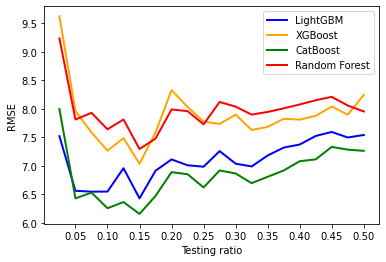

In [15]:
plt.plot(ratio, list17, lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list19, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list21, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list23, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=1)
plt.show()

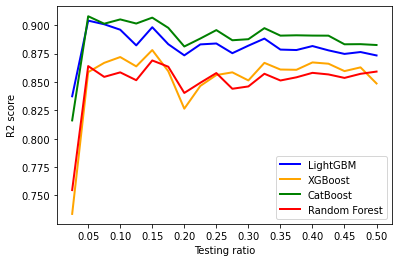

In [16]:
plt.plot(ratio, list18,  lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list20, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list22, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list24, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend()
plt.show()

In [17]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lgbm.fit(X_train, y_train) 
xgb.fit(X_train, y_train) 
cat.fit(X_train, y_train) 
rdf.fit(X_train, y_train)

# training and testing with different models and different categorical feature handling methods
y_pred_lgbm=lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_cat = cat.predict(X_test)
y_pred_rdf = rdf.predict(X_test)
    
print("Model           RMSE      R2") 
print("LightGBM       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)), r2_score(y_test, y_pred_lgbm))) 
print("XGBoost        {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), r2_score(y_test, y_pred_xgb)))
print("CatBoost       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_cat)), r2_score(y_test, y_pred_cat)))
print("Random Forest  {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_rdf)), r2_score(y_test, y_pred_rdf)))

Learning rate set to 0.040088
0:	learn: 20.3841729	total: 1.47ms	remaining: 1.47s
1:	learn: 19.9495356	total: 2.85ms	remaining: 1.42s
2:	learn: 19.5393379	total: 4.27ms	remaining: 1.42s
3:	learn: 19.0866852	total: 5.58ms	remaining: 1.39s
4:	learn: 18.6444806	total: 6.9ms	remaining: 1.37s
5:	learn: 18.2305036	total: 8.32ms	remaining: 1.38s
6:	learn: 17.8226374	total: 9.81ms	remaining: 1.39s
7:	learn: 17.4108681	total: 11.4ms	remaining: 1.41s
8:	learn: 17.0624077	total: 12.8ms	remaining: 1.41s
9:	learn: 16.6641789	total: 14.2ms	remaining: 1.4s
10:	learn: 16.2998052	total: 15.6ms	remaining: 1.4s
11:	learn: 15.9496678	total: 16.8ms	remaining: 1.39s
12:	learn: 15.6279343	total: 18.2ms	remaining: 1.38s
13:	learn: 15.3088329	total: 19.5ms	remaining: 1.37s
14:	learn: 14.9883033	total: 21ms	remaining: 1.38s
15:	learn: 14.6984787	total: 22.4ms	remaining: 1.38s
16:	learn: 14.4072680	total: 23.6ms	remaining: 1.37s
17:	learn: 14.1418514	total: 25.1ms	remaining: 1.37s
18:	learn: 13.8803444	total: 26

215:	learn: 5.6218255	total: 320ms	remaining: 1.16s
216:	learn: 5.6139561	total: 322ms	remaining: 1.16s
217:	learn: 5.6057917	total: 323ms	remaining: 1.16s
218:	learn: 5.6011453	total: 325ms	remaining: 1.16s
219:	learn: 5.5904883	total: 326ms	remaining: 1.16s
220:	learn: 5.5790628	total: 327ms	remaining: 1.15s
221:	learn: 5.5698470	total: 329ms	remaining: 1.15s
222:	learn: 5.5636377	total: 330ms	remaining: 1.15s
223:	learn: 5.5582477	total: 332ms	remaining: 1.15s
224:	learn: 5.5505358	total: 333ms	remaining: 1.15s
225:	learn: 5.5472674	total: 335ms	remaining: 1.15s
226:	learn: 5.5402282	total: 337ms	remaining: 1.15s
227:	learn: 5.5337761	total: 338ms	remaining: 1.14s
228:	learn: 5.5239037	total: 339ms	remaining: 1.14s
229:	learn: 5.5161182	total: 341ms	remaining: 1.14s
230:	learn: 5.5142829	total: 342ms	remaining: 1.14s
231:	learn: 5.5087437	total: 344ms	remaining: 1.14s
232:	learn: 5.4970575	total: 345ms	remaining: 1.14s
233:	learn: 5.4916734	total: 347ms	remaining: 1.14s
234:	learn: 

419:	learn: 4.6677984	total: 653ms	remaining: 902ms
420:	learn: 4.6660097	total: 654ms	remaining: 900ms
421:	learn: 4.6622458	total: 656ms	remaining: 898ms
422:	learn: 4.6587283	total: 657ms	remaining: 896ms
423:	learn: 4.6525848	total: 658ms	remaining: 894ms
424:	learn: 4.6470365	total: 659ms	remaining: 892ms
425:	learn: 4.6448260	total: 661ms	remaining: 890ms
426:	learn: 4.6391757	total: 662ms	remaining: 888ms
427:	learn: 4.6359764	total: 663ms	remaining: 886ms
428:	learn: 4.6346021	total: 664ms	remaining: 884ms
429:	learn: 4.6304115	total: 665ms	remaining: 882ms
430:	learn: 4.6275605	total: 667ms	remaining: 880ms
431:	learn: 4.6230427	total: 668ms	remaining: 878ms
432:	learn: 4.6222779	total: 669ms	remaining: 876ms
433:	learn: 4.6166434	total: 671ms	remaining: 875ms
434:	learn: 4.6143157	total: 672ms	remaining: 872ms
435:	learn: 4.6096478	total: 673ms	remaining: 870ms
436:	learn: 4.6069011	total: 674ms	remaining: 868ms
437:	learn: 4.6023990	total: 675ms	remaining: 866ms
438:	learn: 

701:	learn: 4.0788823	total: 985ms	remaining: 418ms
702:	learn: 4.0768870	total: 986ms	remaining: 417ms
703:	learn: 4.0751943	total: 988ms	remaining: 415ms
704:	learn: 4.0740149	total: 989ms	remaining: 414ms
705:	learn: 4.0727032	total: 990ms	remaining: 412ms
706:	learn: 4.0712975	total: 991ms	remaining: 411ms
707:	learn: 4.0690527	total: 993ms	remaining: 409ms
708:	learn: 4.0681186	total: 994ms	remaining: 408ms
709:	learn: 4.0659912	total: 995ms	remaining: 407ms
710:	learn: 4.0646347	total: 996ms	remaining: 405ms
711:	learn: 4.0636081	total: 998ms	remaining: 404ms
712:	learn: 4.0619223	total: 999ms	remaining: 402ms
713:	learn: 4.0613617	total: 1s	remaining: 401ms
714:	learn: 4.0600560	total: 1s	remaining: 399ms
715:	learn: 4.0583352	total: 1s	remaining: 398ms
716:	learn: 4.0575517	total: 1s	remaining: 396ms
717:	learn: 4.0559417	total: 1s	remaining: 395ms
718:	learn: 4.0539143	total: 1.01s	remaining: 393ms
719:	learn: 4.0527197	total: 1.01s	remaining: 392ms
720:	learn: 4.0521178	total

950:	learn: 3.8244197	total: 1.31s	remaining: 67.5ms
951:	learn: 3.8239690	total: 1.31s	remaining: 66.1ms
952:	learn: 3.8233583	total: 1.31s	remaining: 64.8ms
953:	learn: 3.8227074	total: 1.31s	remaining: 63.4ms
954:	learn: 3.8220998	total: 1.31s	remaining: 62ms
955:	learn: 3.8213953	total: 1.32s	remaining: 60.6ms
956:	learn: 3.8209341	total: 1.32s	remaining: 59.3ms
957:	learn: 3.8199031	total: 1.32s	remaining: 57.9ms
958:	learn: 3.8189353	total: 1.32s	remaining: 56.5ms
959:	learn: 3.8182261	total: 1.32s	remaining: 55.1ms
960:	learn: 3.8180419	total: 1.32s	remaining: 53.8ms
961:	learn: 3.8175404	total: 1.33s	remaining: 52.4ms
962:	learn: 3.8175164	total: 1.33s	remaining: 51ms
963:	learn: 3.8173001	total: 1.33s	remaining: 49.6ms
964:	learn: 3.8165217	total: 1.33s	remaining: 48.3ms
965:	learn: 3.8153797	total: 1.33s	remaining: 46.9ms
966:	learn: 3.8149400	total: 1.33s	remaining: 45.5ms
967:	learn: 3.8143875	total: 1.33s	remaining: 44.1ms
968:	learn: 3.8136115	total: 1.33s	remaining: 42.7

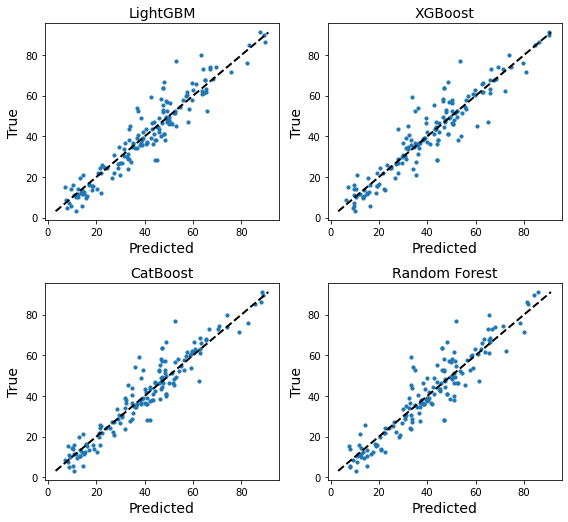

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lgbm, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("LightGBM", fontsize = 14) 

ax2.scatter(y_pred_xgb, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("XGBoost", fontsize = 14) 

ax3.scatter(y_pred_cat, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("CatBoost", fontsize = 14) 

ax4.scatter(y_pred_rdf, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Random Forest", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

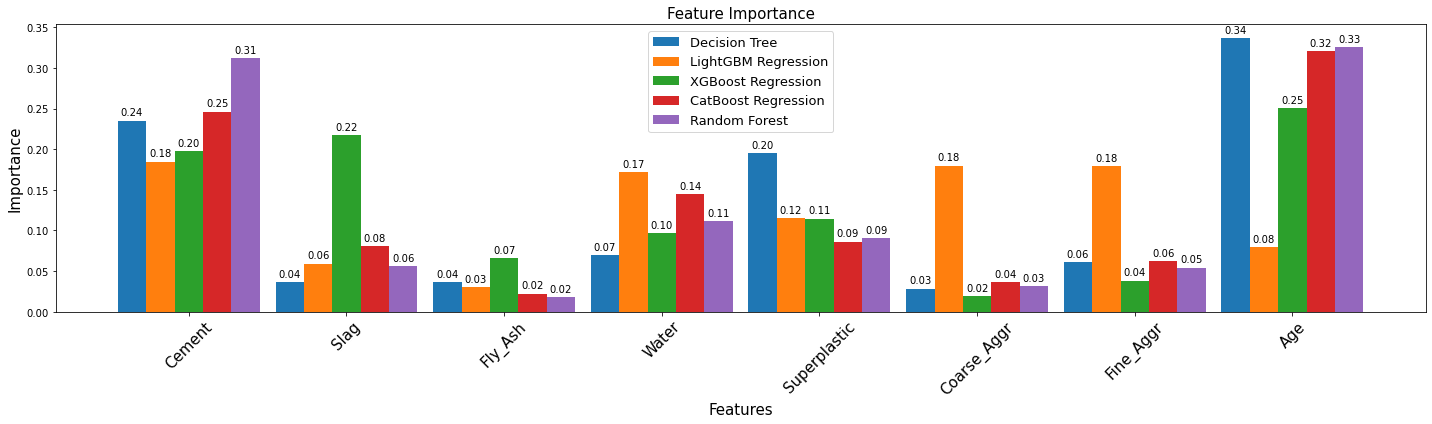

In [19]:
feature_dtr = dtr.feature_importances_ 
feature_lgbm = lgbm.feature_importances_
feature_xgb = xgb.feature_importances_ 
feature_cat = cat.feature_importances_
feature_rdf = rdf.feature_importances_ 

feature_lgbm = feature_lgbm/sum(feature_lgbm)
feature_cat = feature_cat/sum(feature_cat)

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.18
fig, ax = plt.subplots(figsize=(20,6)) 
rects1 = ax.bar(x-2*(width), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x-1*(width), feature_lgbm,width, label='LightGBM Regression') 
rects3 = ax.bar(x          , feature_xgb, width, label='XGBoost Regression') 
rects4 = ax.bar(x+1*(width), feature_cat, width, label='CatBoost Regression') 
rects5 = ax.bar(x+2*(width), feature_rdf, width, label='Random Forest') 

ax.set_ylabel('Importance', fontsize = 15) 
ax.set_xlabel('Features', fontsize = 15) 
ax.set_title('Feature Importance', fontsize = 15) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 15) 
ax.legend(loc=9, fontsize = 13) 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3) 
autolabel(rects4) 
autolabel(rects5) 
fig.tight_layout() 
plt.show()